Modelos de Predicción para la Detección de Diabetes y Colesterol con Inteligencia Artificial
Este ejercicio tiene como objetivo desarrollar tres modelos predictivos aplicando distintas 
técnicas de IA: regresión, clasificación y clustering. Se trabajará con un conjunto de datos que 
contiene diversas variables clínicas y de estilo de vida relacionadas con la diabetes y el 
colesterol.
El objetivo del ejercicio es analizar el datasheet y construir tres modelos de predicción distintos:
• Modelo de regresión 
• Modelo de clasificación 
• Modelo de clustering 
El datasheet incluye las siguientes variables: 
• Edad: nivel normalizado de la edad del paciente
• Colesterol: nivel normalizado de colesterol
• Frecuencia cardiaca: nivel normalizado de latidos por minuto
• Historial familiar: indica si hay antecedentes de diabetes en la familia (1 = Sí, 0 = No)
• Tabaquismo: Indica si el paciente fuma (1 = Sí, 0 = No)
• Obesidad: indica si el paciente tiene obesidad (1 = Sí, 0 = No)
• Consumo de alcohol: indica si el paciente consume alcohol regularmente (1 = Sí, 0 = 
No)
• Horas de Ejercicio por Semana: cantidad normalizada de ejercicio realizado
• Dieta: indicador cualitativo del tiempo de alimentación (valores categóricos)
• Días de Actividad Física por Semana: número de días de actividad física
• Horas de sueño por día: horas de sueño promedio diarias 
• Nivel de azúcar en sangre: nivel normalizado de glucosa en sangre
• Marcadores clínicos: incluye valores normalizados de CK-MB y Troponin
• Presión arterial: niveles normalizados de presión arterial sistólica y diastólica 
• Género: sexo del paciente
• Riesgo de diabetes (binario)
Desarrollo de los modelos: 
1. Regresión: implementar un modelo de regresión logística o lineal para predecir la 
probabilidad de tener diabetes
2. Clasificación: utilizar algoritmos como árboles para diagnosticar diabetes
3. Clustering: agrupa pacientes según su nivel de colesterol 
Este ejercicio permite comprender la aplicación de la inteligencia artificial en el ámbito médico, 
específicamente en la detección temprana de diabetes y colesterol.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  


Análisis descriptivo

In [2]:
df = pd.read_csv('heart-attack-risk-prediction-dataset.csv')
df.head()


Age  Cholesterol  Heart rate  Diabetes  Family History  Smoking  \
0  0.595506     0.314286    0.047663       0.0             0.0      1.0   
1  0.595506     0.096429    0.047663       1.0             1.0      1.0   
2  0.595506     0.189286    0.047663       0.0             0.0      1.0   
3  0.078652     0.960714    0.071494       1.0             1.0      1.0   
4  0.078652     0.792857    0.071494       1.0             0.0      1.0   

   Obesity  Alcohol Consumption  Exercise Hours Per Week  Diet  ...  \
0      0.0                  0.0                 0.208326     0  ...   
1      1.0                  1.0                 0.752420     1  ...   
2      0.0                  1.0                 0.200998     2  ...   
3      1.0                  1.0                 0.090557     2  ...   
4      1.0                  0.0                 0.601030     2  ...   

   Physical Activity Days Per Week  Sleep Hours Per Day  \
0                              0.0             0.333333   
1                              2.0             0.666667   
2                              4.0             1.000000   
3                              1.0             0.500000   
4                              1.0             0.166667   

   Heart Attack Risk (Binary)  Blood sugar     CK-MB  Troponin  \
0                         0.0     0.227018  0.048229  0.036512   
1                         0.0     0.227018  0.048229  0.036512   
2                         0.0     0.227018  0.048229  0.036512   
3                         0.0     0.227018  0.048229  0.036512   
4                         0.0     0.227018  0.048229  0.036512   

   Heart Attack Risk (Text)  Gender  Systolic blood pressure  \
0                         0    Male                 0.600000   
1                         0    Male                 0.574194   
2                         0    Male                 0.187097   
3                         0    Male                 0.645161   
4                         0    Male                 0.251613   

   Diastolic blood pressure  
0                  0.534884  
1                  0.569767  
2                  0.674419  
3                  0.593023  
4                  0.383721  

[5 rows x 27 columns]

In [3]:
df.shape

(9651, 27)

In [4]:
df.describe()

Age  Cholesterol   Heart rate     Diabetes  Family History  \
count  9651.000000  9651.000000  9651.000000  9377.000000     9377.000000   
mean      0.450254     0.499780     0.050756     0.652554        0.488749   
std       0.231154     0.284461     0.024922     0.476184        0.499900   
min       0.000000     0.000000     0.000000     0.000000        0.000000   
25%       0.258427     0.264286     0.035289     0.000000        0.000000   
50%       0.460674     0.499780     0.050412     1.000000        0.000000   
75%       0.640449     0.739286     0.065995     1.000000        1.000000   
max       1.000000     1.000000     1.000000     1.000000        1.000000   

           Smoking      Obesity  Alcohol Consumption  Exercise Hours Per Week  \
count  9377.000000  9377.000000          9377.000000              9651.000000   
mean      0.902421     0.500160             0.600192                 0.502110   
std       0.296761     0.500027             0.489885                 0.284830   
min       0.000000     0.000000             0.000000                 0.000000   
25%       1.000000     0.000000             0.000000                 0.259793   
50%       1.000000     1.000000             1.000000                 0.502110   
75%       1.000000     1.000000             1.000000                 0.747086   
max       1.000000     1.000000             1.000000                 1.000000   

              Diet  ...  Triglycerides  Physical Activity Days Per Week  \
count  9651.000000  ...    9651.000000                      9377.000000   
mean      1.057093  ...       0.503603                         3.501866   
std       0.868418  ...       0.286183                         2.283833   
min       0.000000  ...       0.000000                         0.000000   
25%       0.000000  ...       0.262338                         2.000000   
50%       1.000000  ...       0.503603                         3.000000   
75%       2.000000  ...       0.748052                         6.000000   
max       3.000000  ...       1.000000                         7.000000   

       Sleep Hours Per Day  Heart Attack Risk (Binary)  Blood sugar  \
count          9651.000000                 9651.000000  9651.000000   
mean              0.504621                    0.345146     0.227018   
std               0.327482                    0.475440     0.075577   
min               0.000000                    0.000000     0.000000   
25%               0.166667                    0.000000     0.227018   
50%               0.500000                    0.000000     0.227018   
75%               0.833333                    1.000000     0.227018   
max               1.000000                    1.000000     1.000000   

             CK-MB     Troponin  Heart Attack Risk (Text)  \
count  9651.000000  9651.000000               9651.000000   
mean      0.048229     0.036512                  0.398093   
std       0.075959     0.059556                  0.737488   
min       0.000000     0.000000                  0.000000   
25%       0.048229     0.036512                  0.000000   
50%       0.048229     0.036512                  0.000000   
75%       0.048229     0.036512                  0.000000   
max       1.000000     1.000000                  2.000000   

       Systolic blood pressure  Diastolic blood pressure  
count              9651.000000               9651.000000  
mean                  0.449982                  0.497553  
std                   0.170344                  0.172033  
min                   0.000000                  0.000000  
25%                   0.303226                  0.348837  
50%                   0.445161                  0.500000  
75%                   0.600000                  0.651163  
max                   1.000000                  1.000000  

[8 rows x 26 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              9651 non-null   float64
 1   Cholesterol                      9651 non-null   float64
 2   Heart rate                       9651 non-null   float64
 3   Diabetes                         9377 non-null   float64
 4   Family History                   9377 non-null   float64
 5   Smoking                          9377 non-null   float64
 6   Obesity                          9377 non-null   float64
 7   Alcohol Consumption              9377 non-null   float64
 8   Exercise Hours Per Week          9651 non-null   float64
 9   Diet                             9651 non-null   int64  
 10  Previous Heart Problems          9377 non-null   float64
 11  Medication Use                   9377 non-null   float64
 12  Stress Level        

In [6]:
df.isnull().sum()

Age                                  0
Cholesterol                          0
Heart rate                           0
Diabetes                           274
Family History                     274
Smoking                            274
Obesity                            274
Alcohol Consumption                274
Exercise Hours Per Week              0
Diet                                 0
Previous Heart Problems            274
Medication Use                     274
Stress Level                       274
Sedentary Hours Per Day              0
Income                               0
BMI                                  0
Triglycerides                        0
Physical Activity Days Per Week    274
Sleep Hours Per Day                  0
Heart Attack Risk (Binary)           0
Blood sugar                          0
CK-MB                                0
Troponin                             0
Heart Attack Risk (Text)             0
Gender                               0
Systolic blood pressure  

In [7]:
df = df.dropna()

In [8]:
df.isnull().sum()

Age                                0
Cholesterol                        0
Heart rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Heart Attack Risk (Binary)         0
Blood sugar                        0
CK-MB                              0
Troponin                           0
Heart Attack Risk (Text)           0
Gender                             0
Systolic blood pressure            0
Diastolic blood pressure           0
d

In [9]:
df.duplicated().sum()

0

Analisis univariante

In [10]:
vars_numeric = pd.DataFrame()
vars_categority = pd.DataFrame()
for i in df:
    if i != 'Diabetes' and i != 'Family History' and i != 'Smoking' and i != 'Obesity' and i != 'Alcohol Consumption' and i != 'Diet' and i!= 'Previous Heart Problems' and i != 'Medication Use' and i != 'Physical Activity Days Per Week' and i != 'Sleep Hours Per Day' and i != 'Heart Attack Risk (Binary)' and i != 'Heart Attack Risk (Text)' and i != 'Gender' and i != 'Stress Level':
      vars_numeric[i] = df[i]
    else:
      vars_categority[i] = df[i]

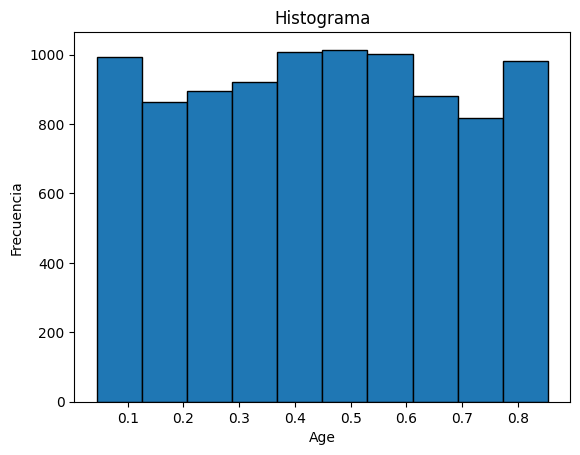

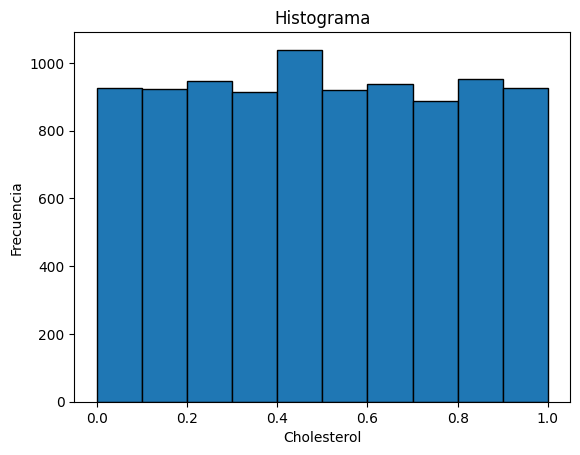

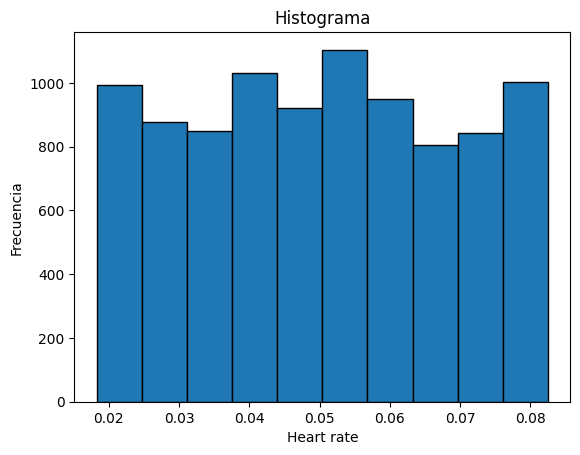

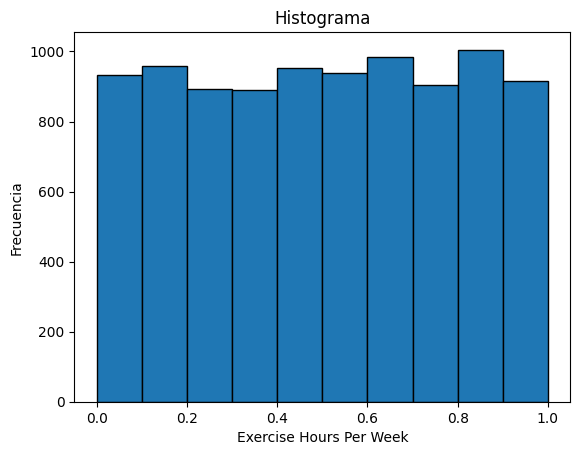

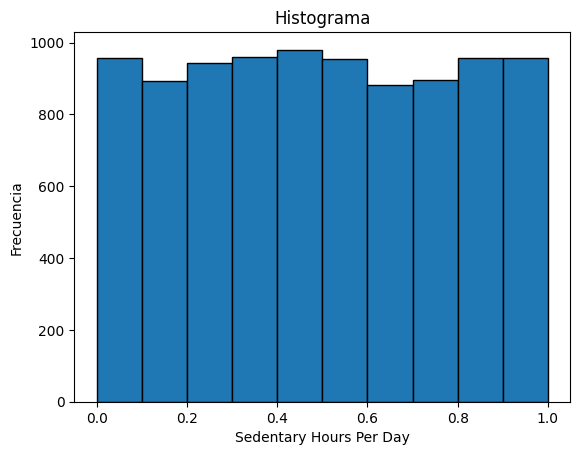

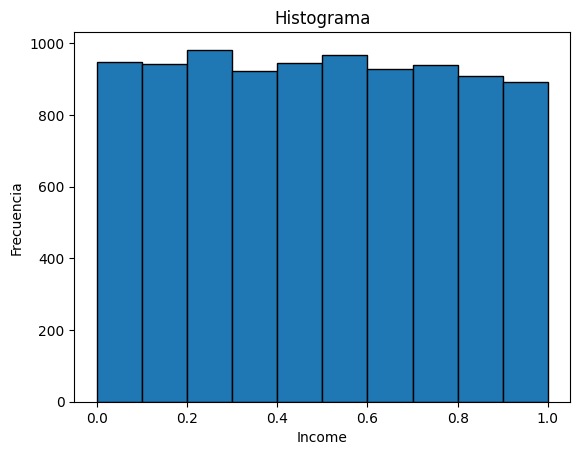

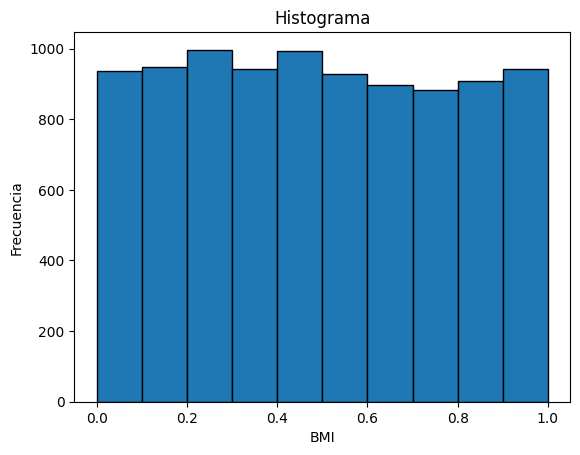

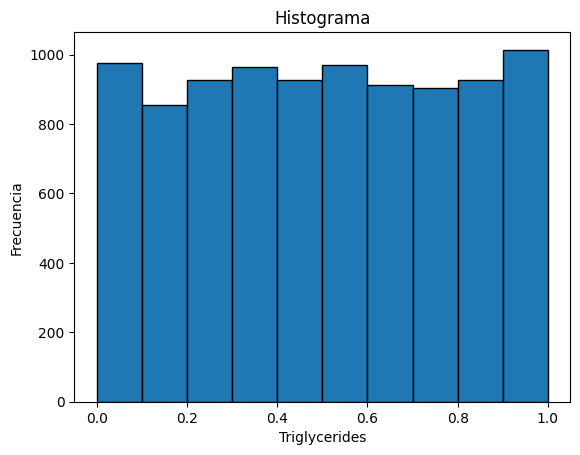

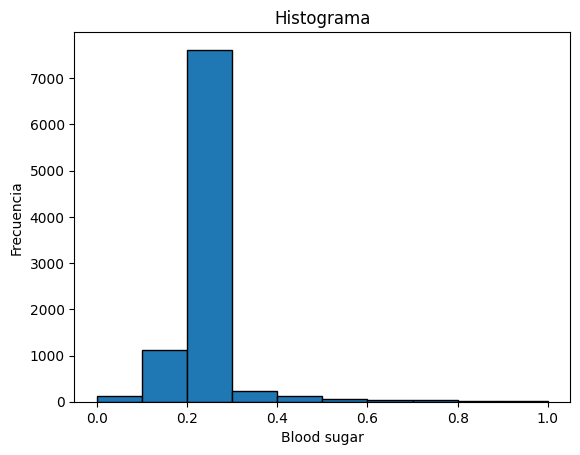

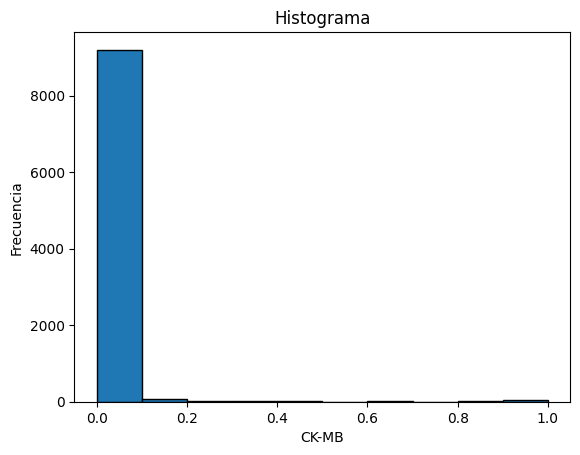

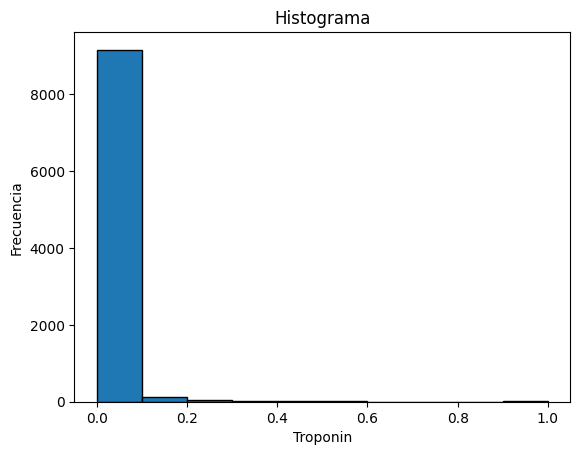

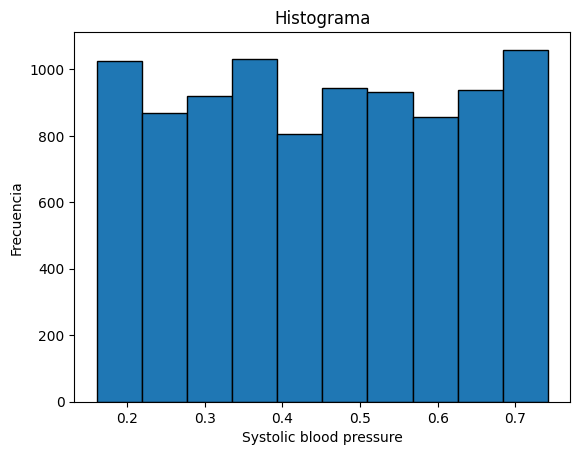

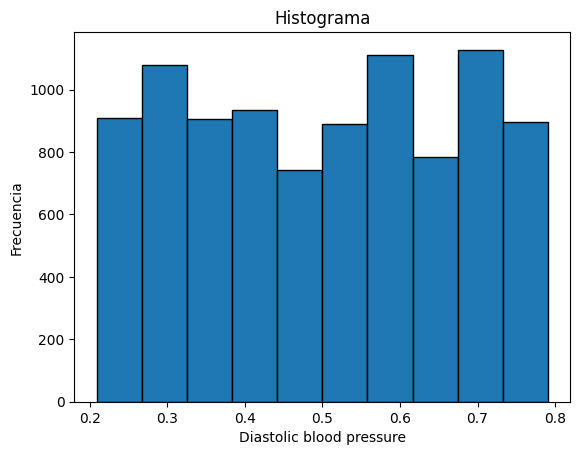

In [11]:

for i in vars_numeric:
    plt.hist(df[i], edgecolor='black')
    plt.title('Histograma')
    plt.xlabel(i)
    plt.ylabel('Frecuencia')
    plt.show()


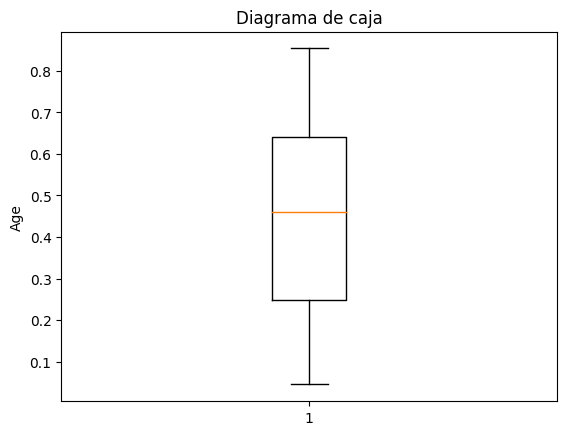

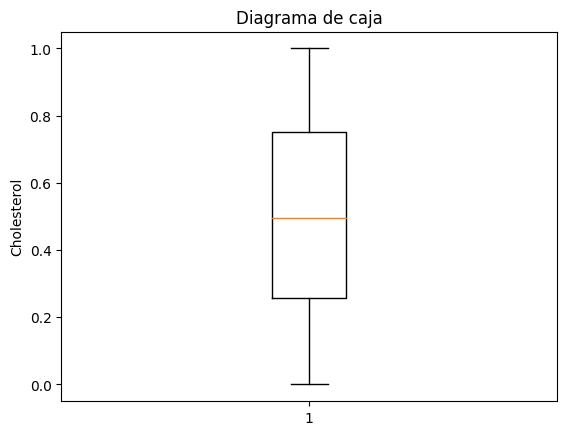

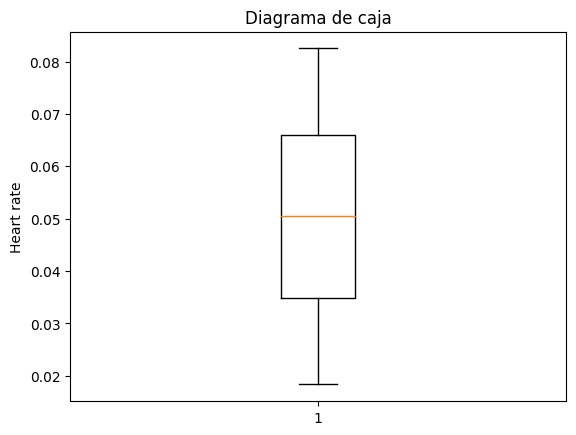

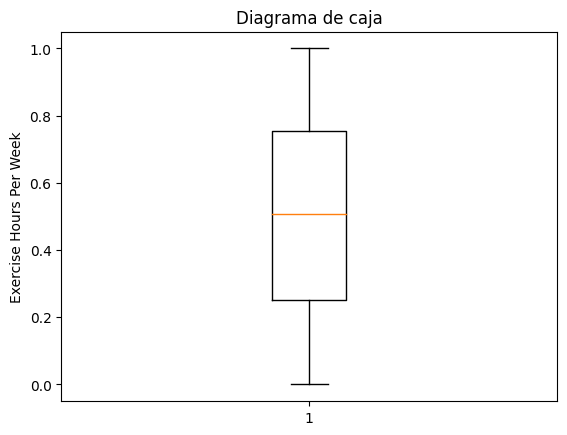

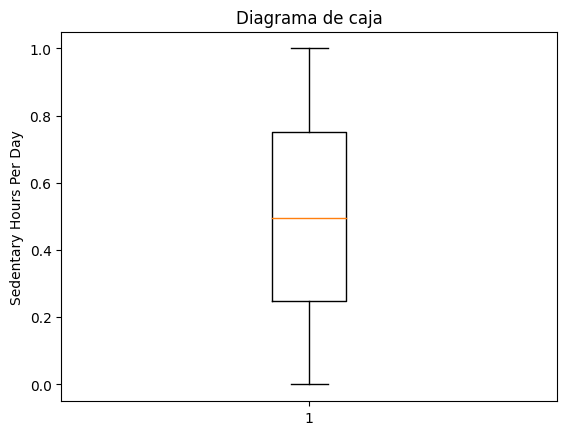

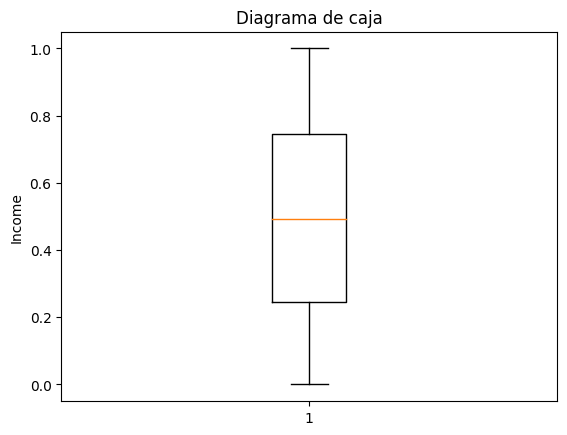

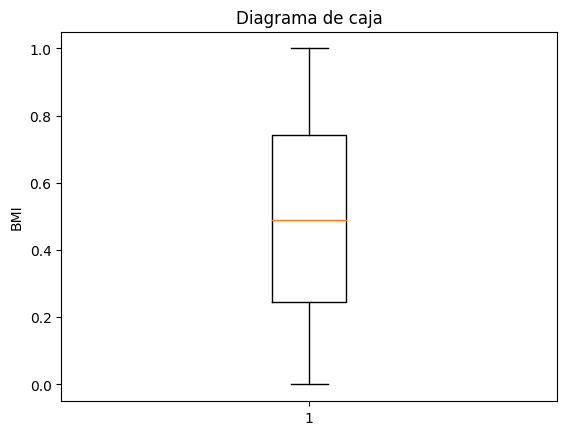

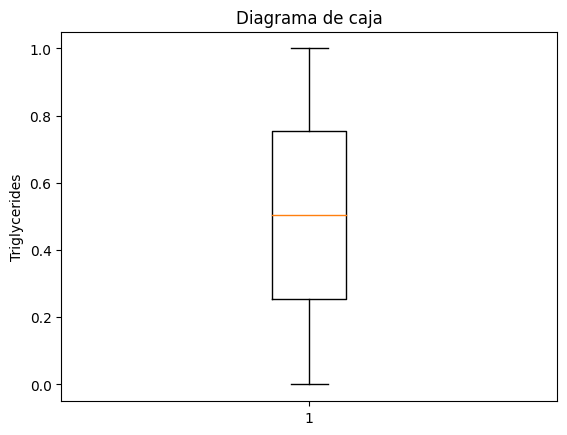

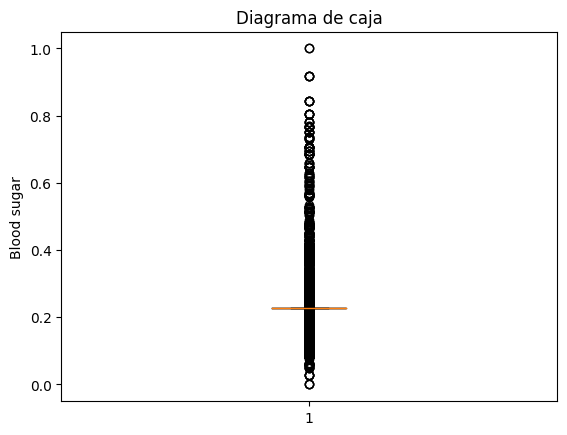

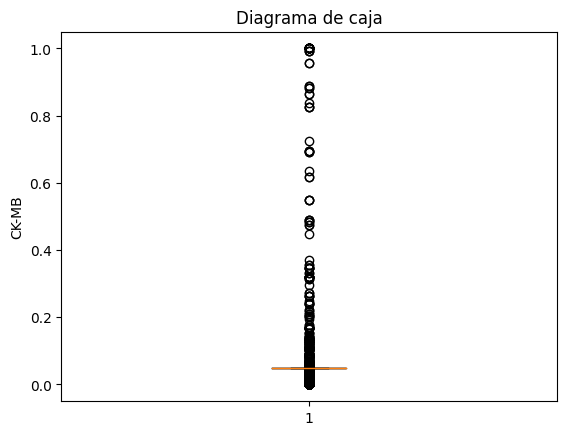

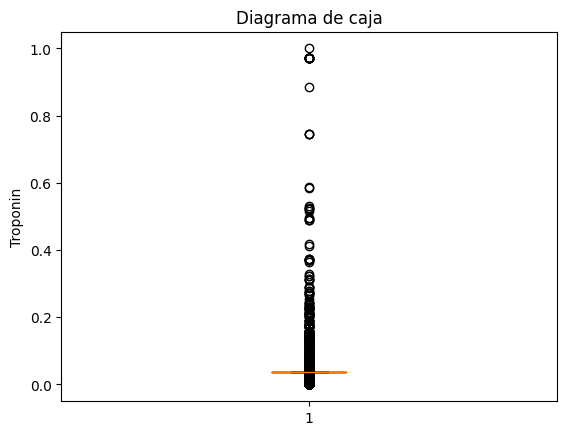

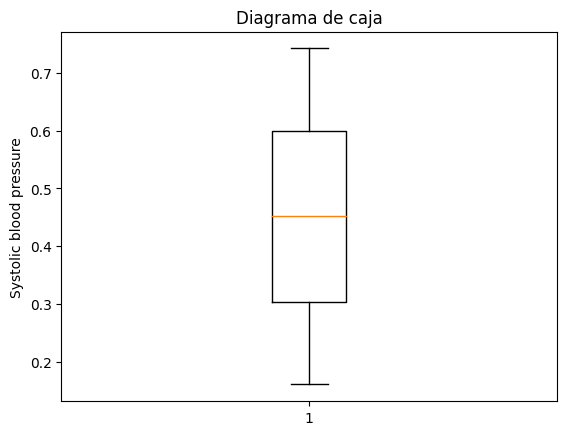

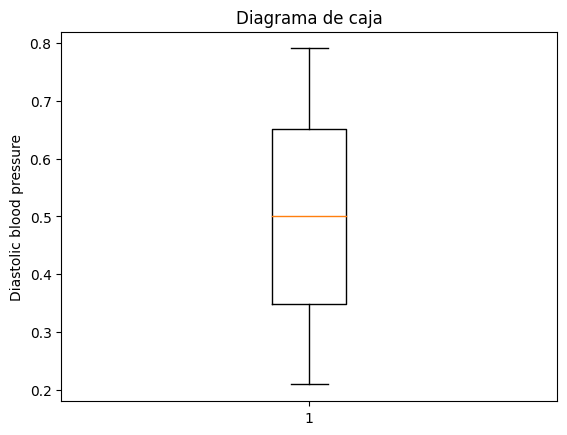

In [12]:
for i in vars_numeric:
    plt.boxplot(df[i])
    plt.title('Diagrama de caja')
    plt.ylabel(i)
    plt.show()
    print()

Analisis univariante de valores categoricos

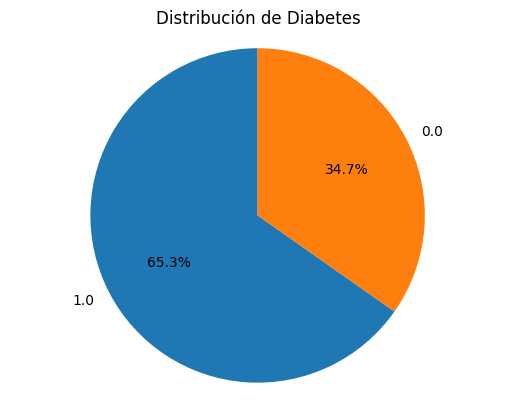

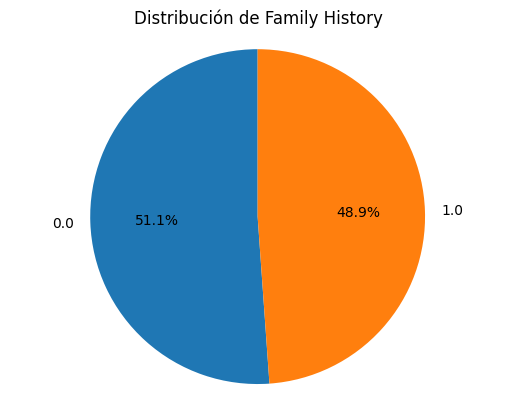

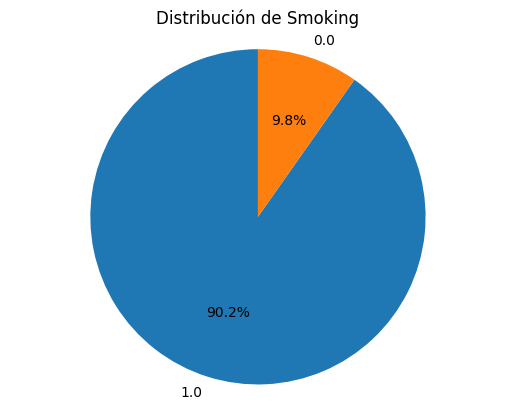

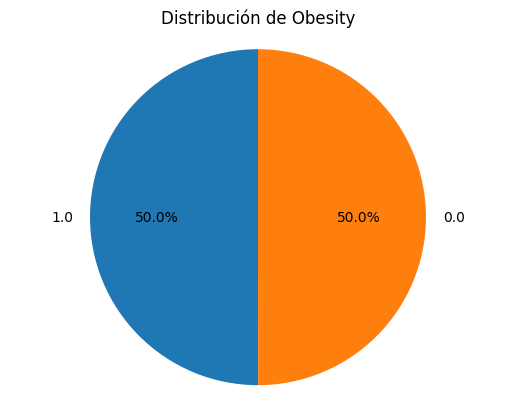

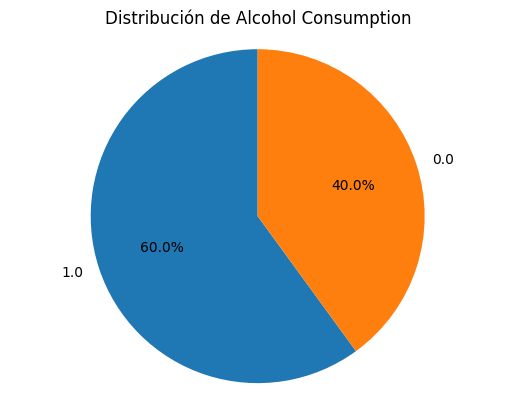

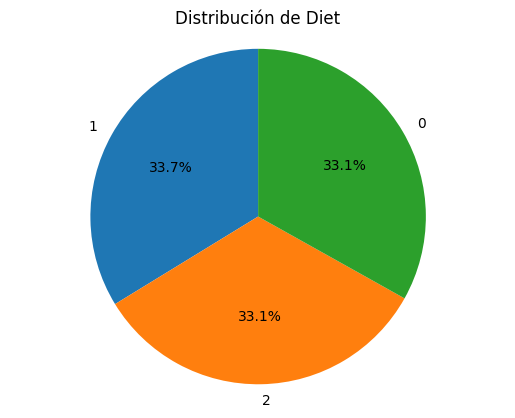

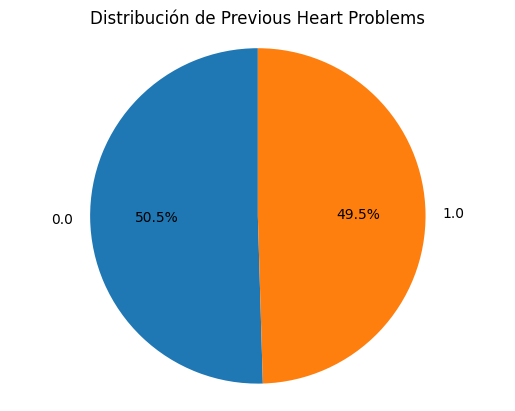

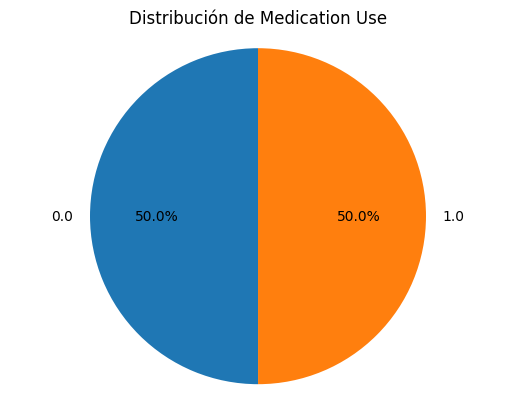

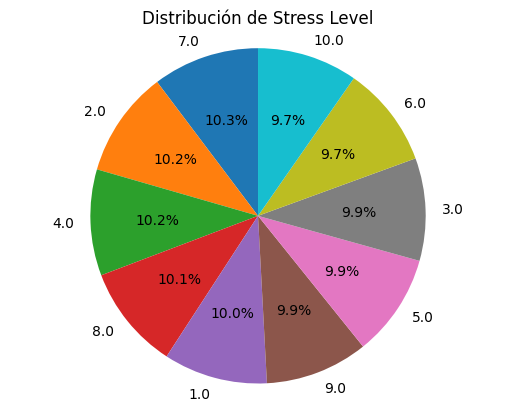

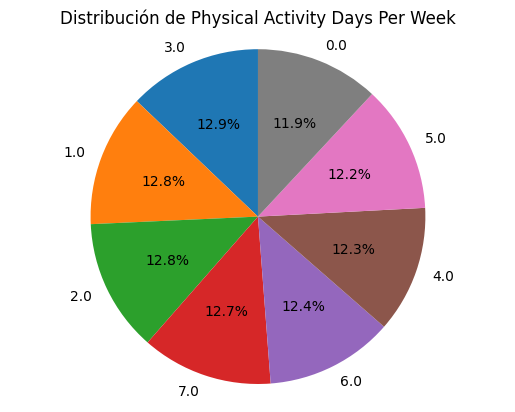

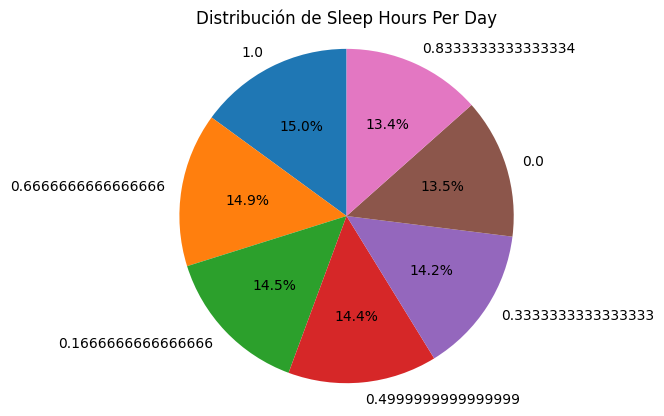

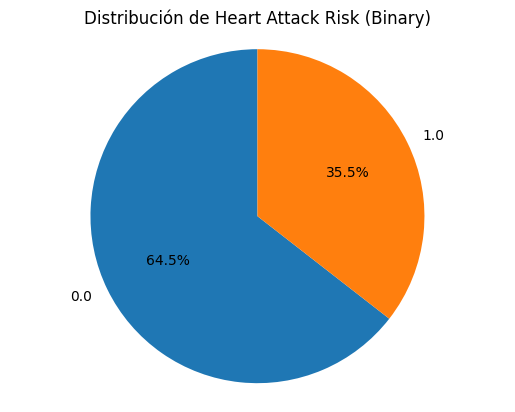

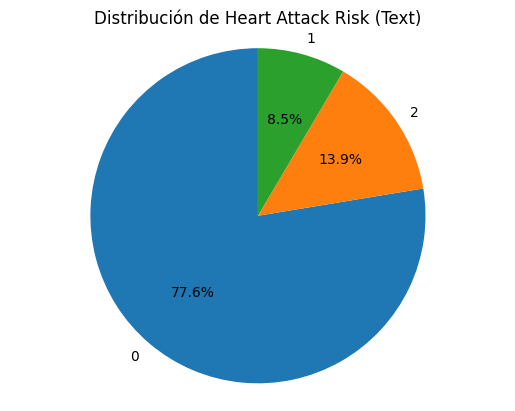

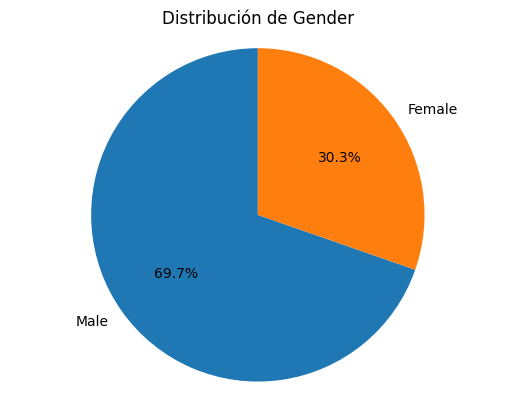

In [13]:
for i in vars_categority:
    value_counts = df[i].value_counts()
    plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
    plt.title('Distribución de ' + i)
    plt.axis('equal') 
    plt.show()

Analisis bivariante

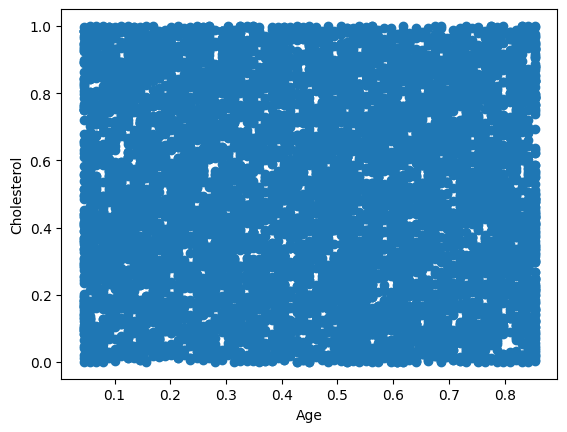

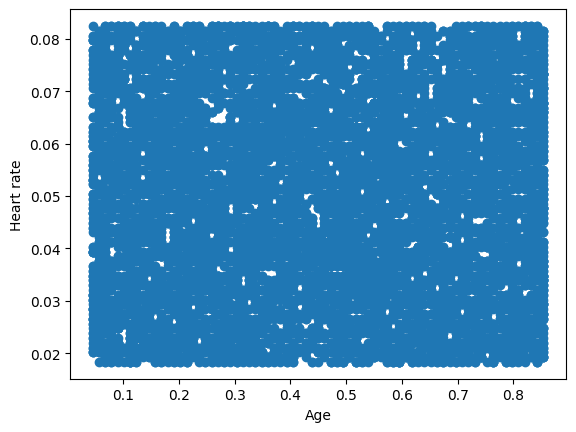

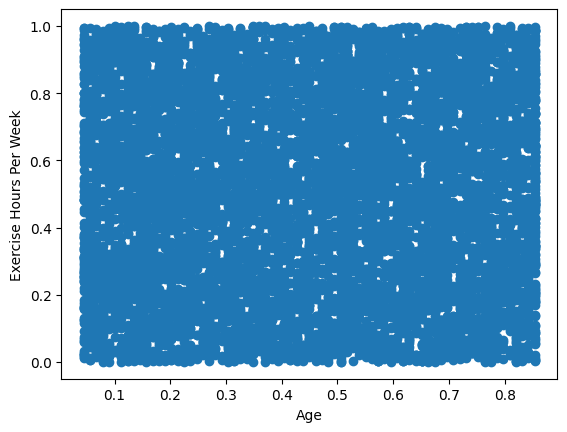

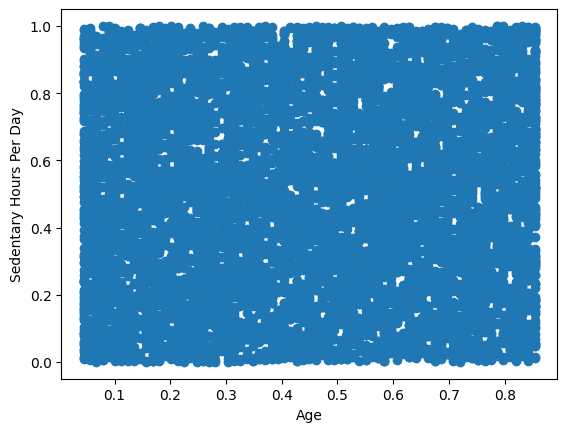

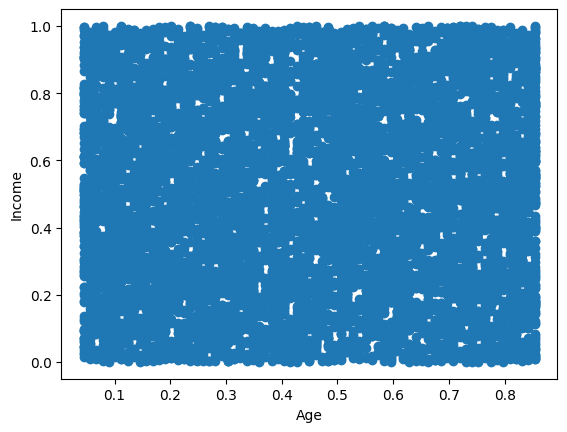

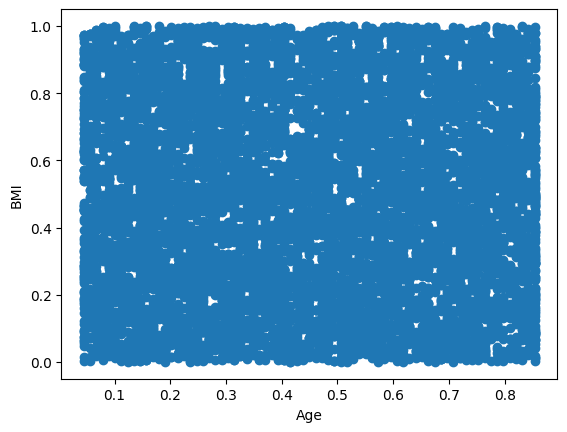

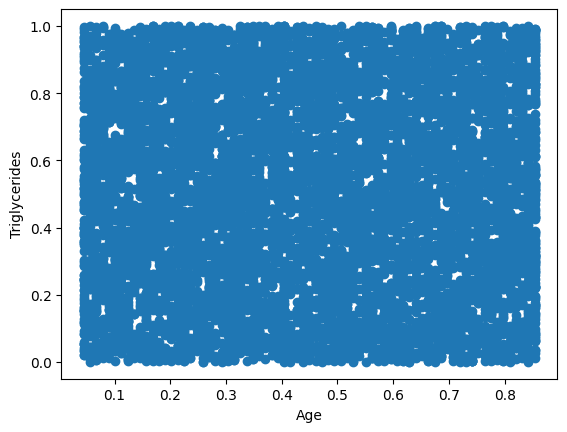

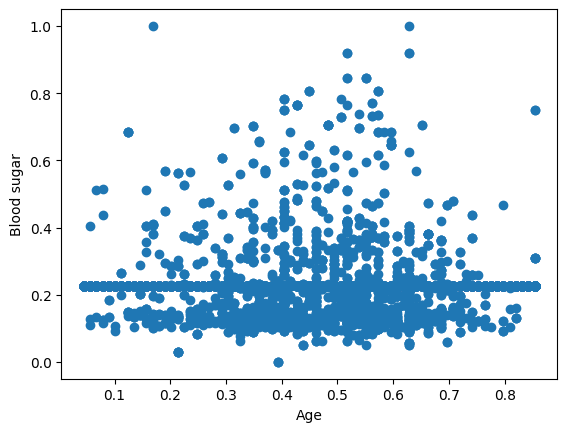

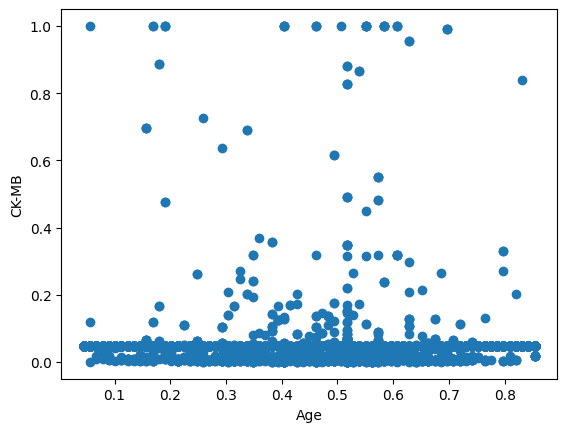

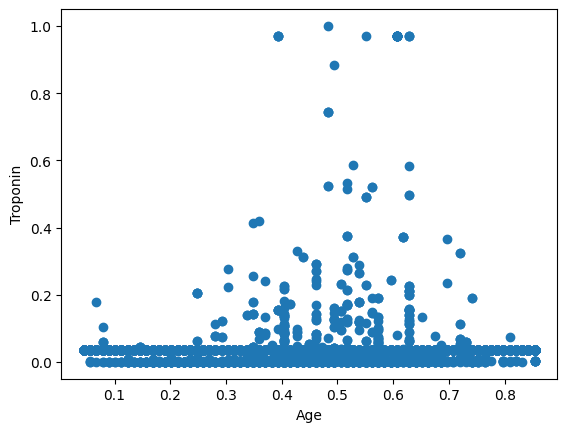

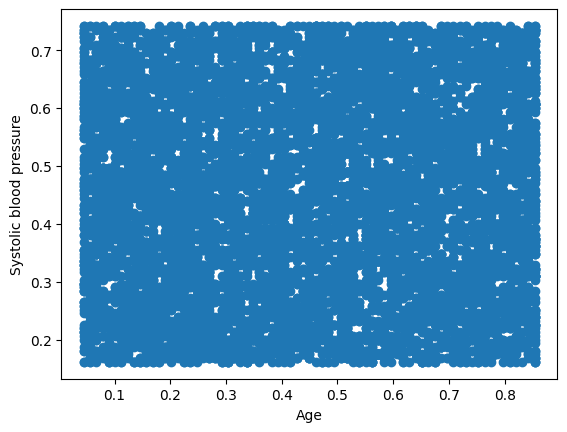

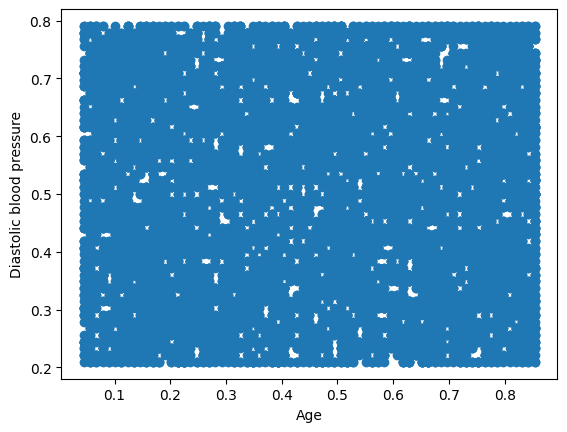

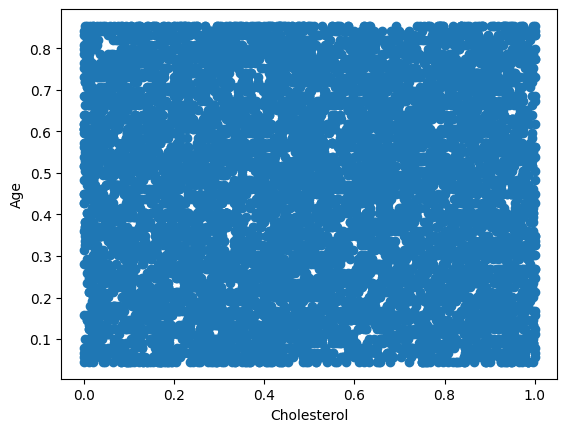

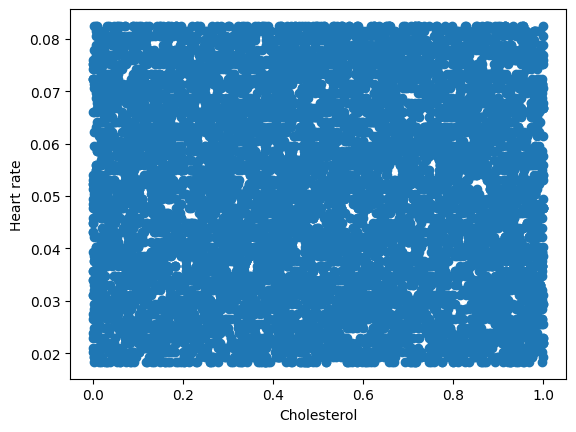

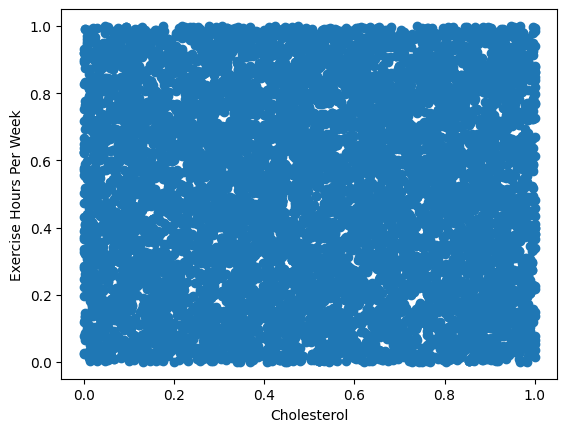

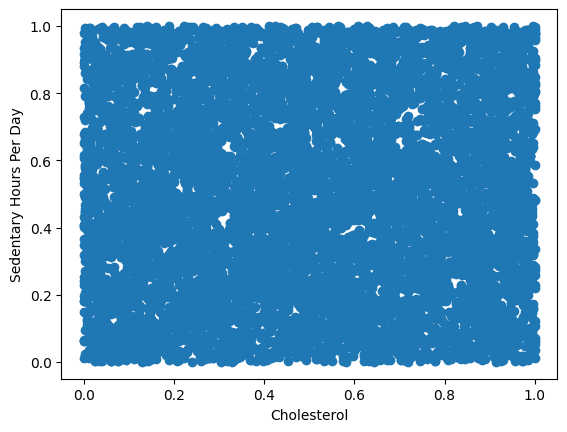

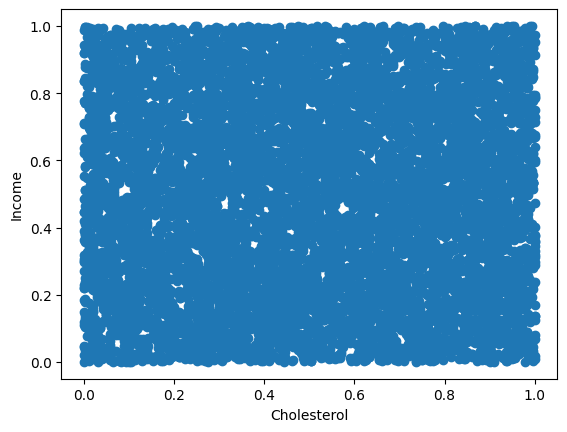

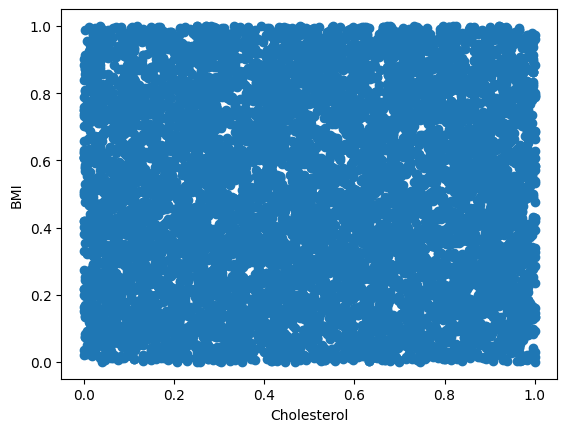

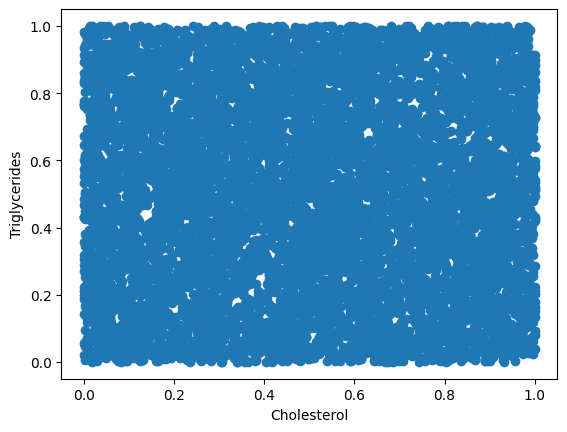

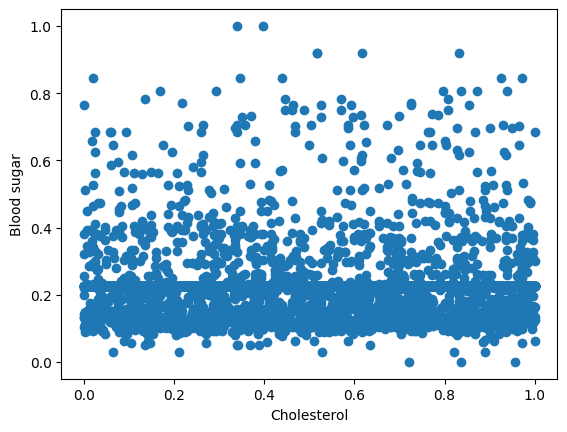

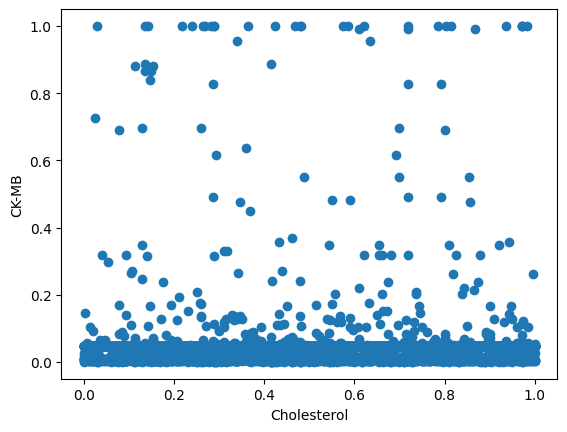

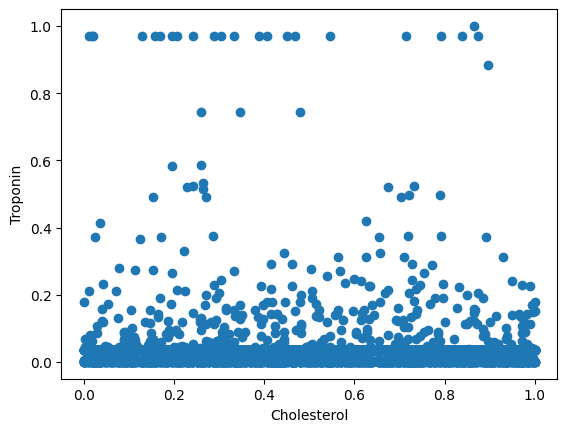

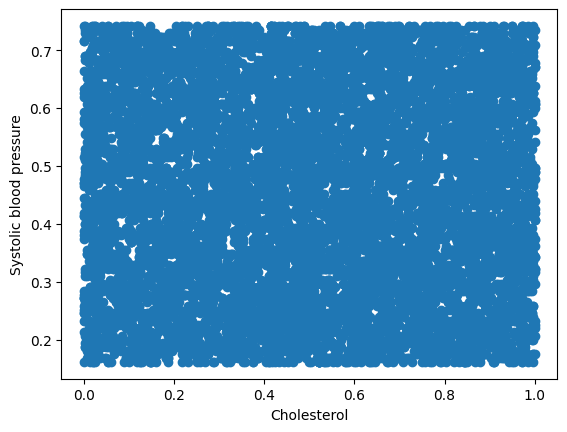

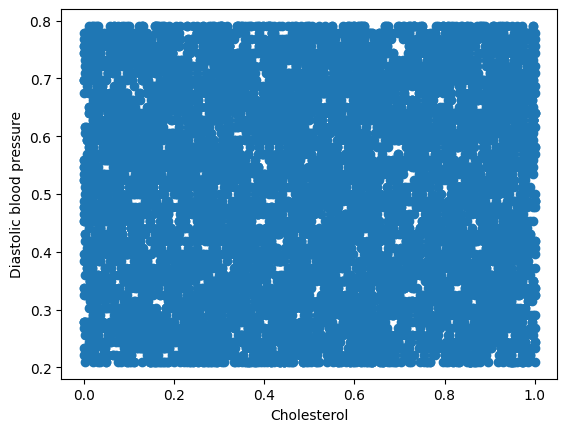

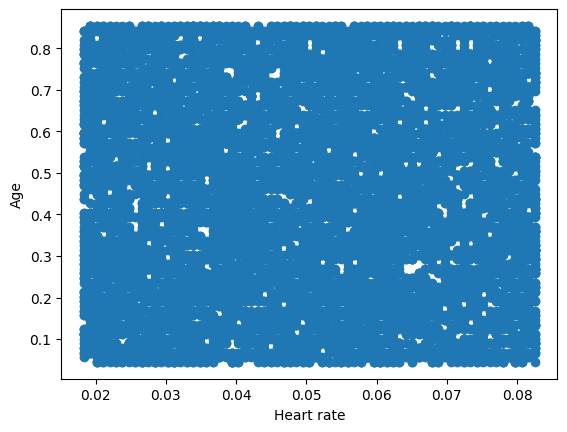

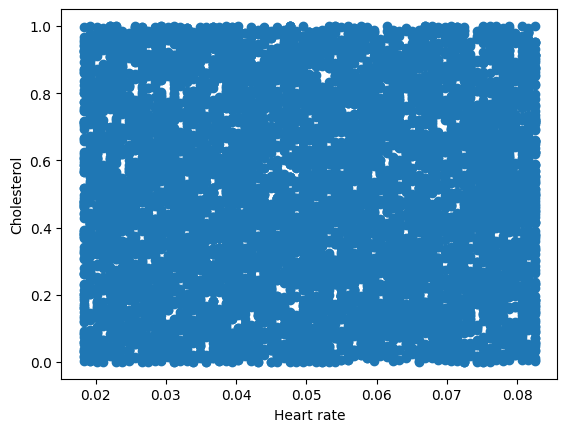

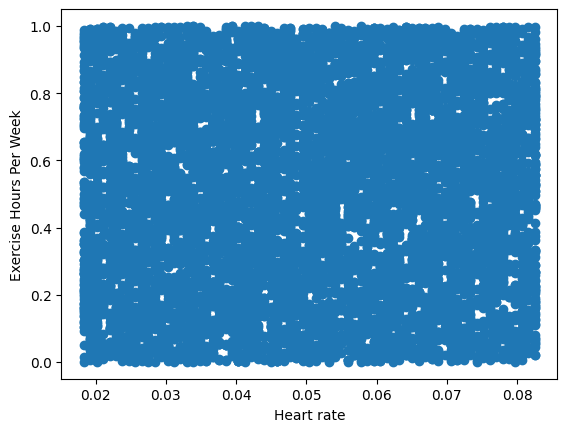

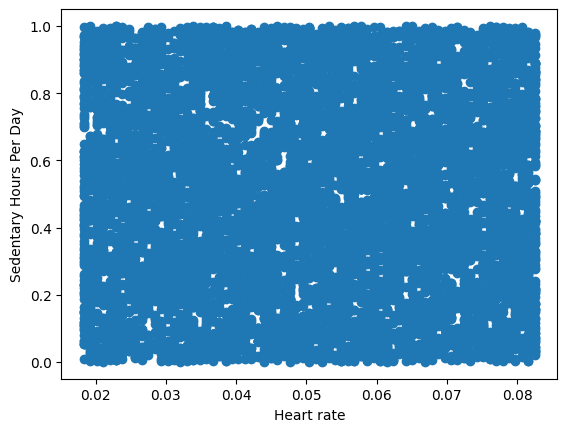

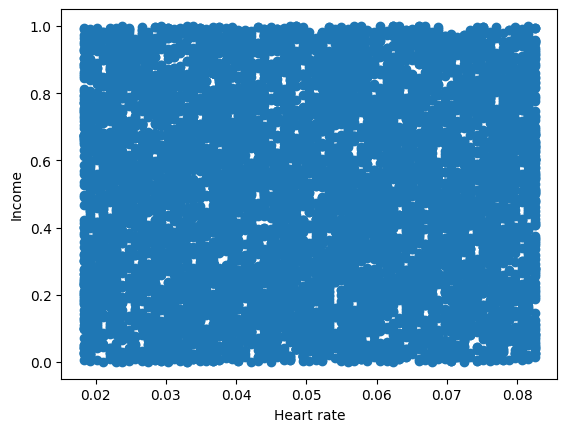

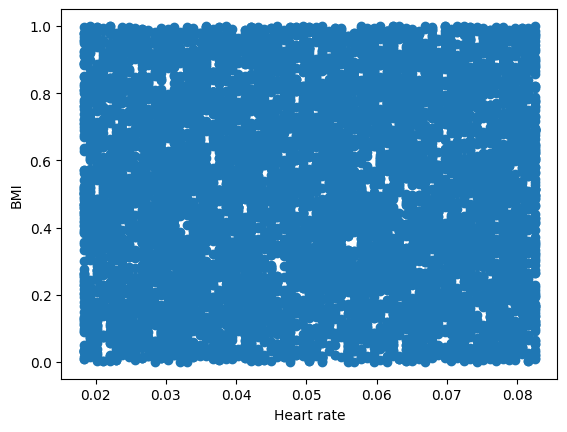

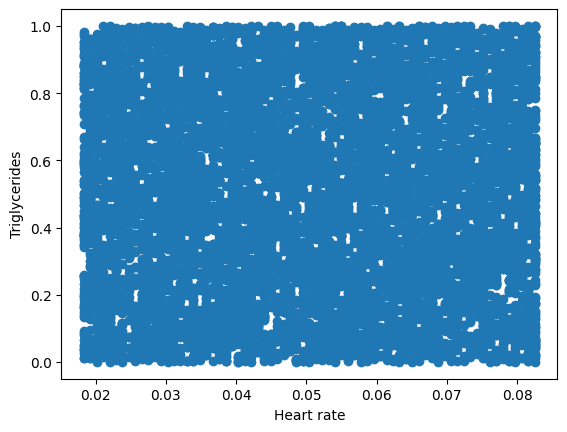

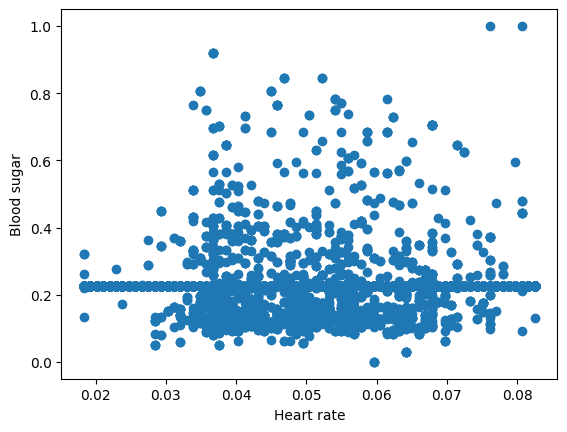

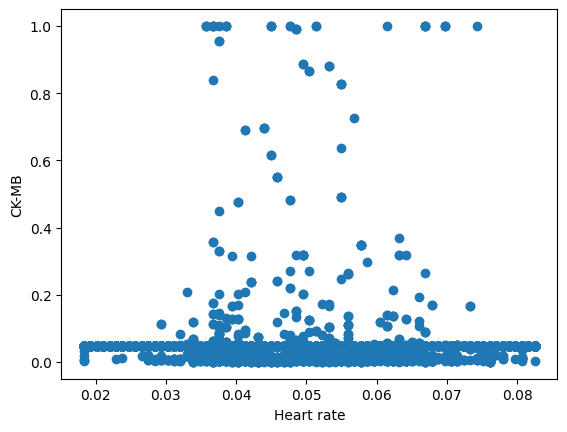

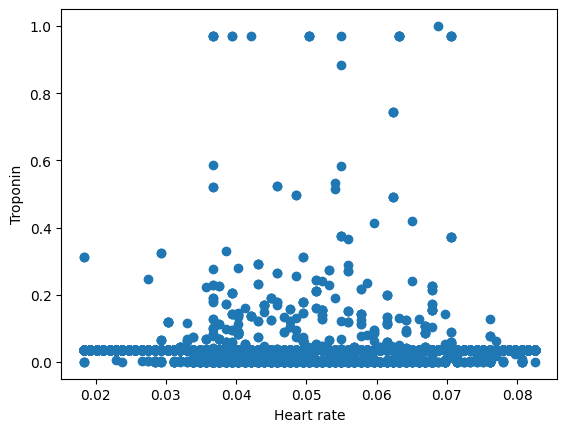

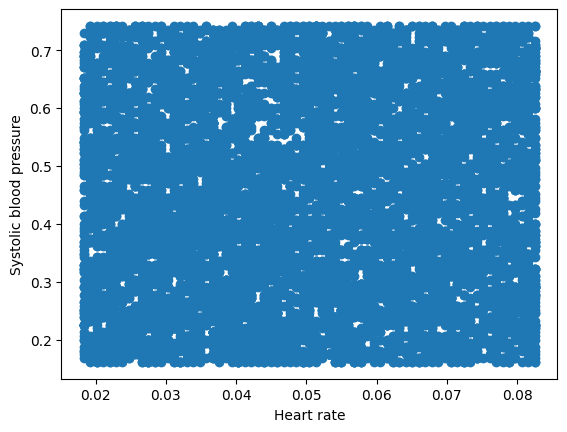

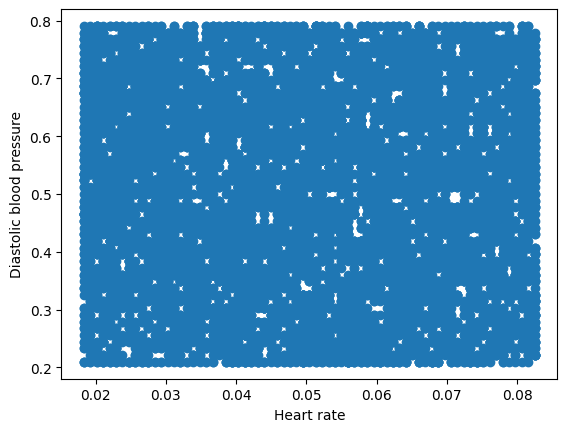

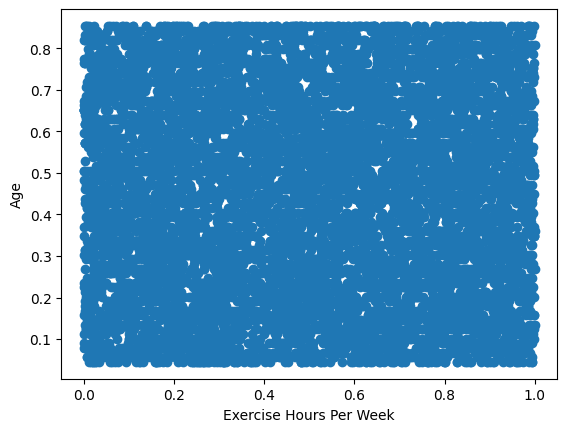

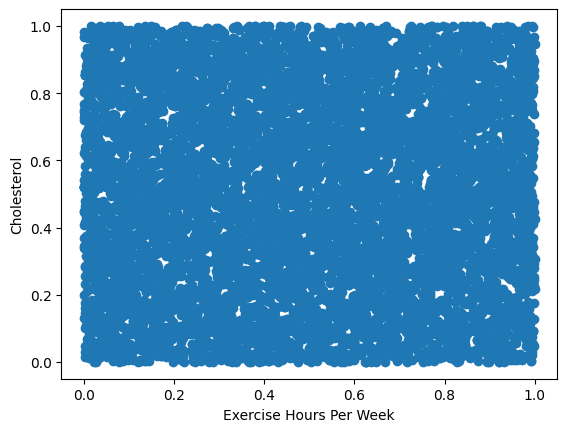

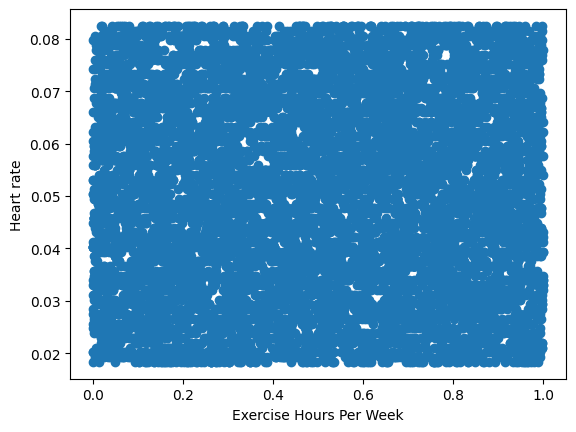

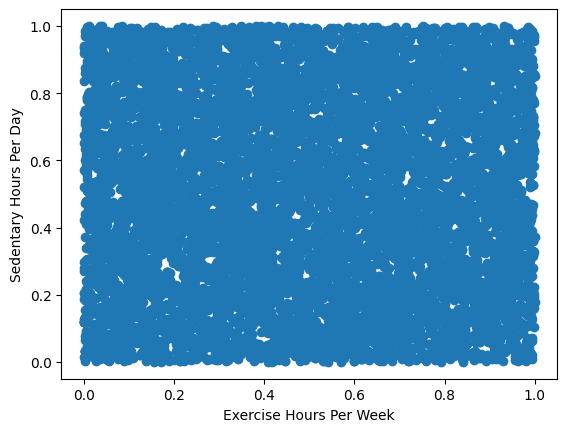

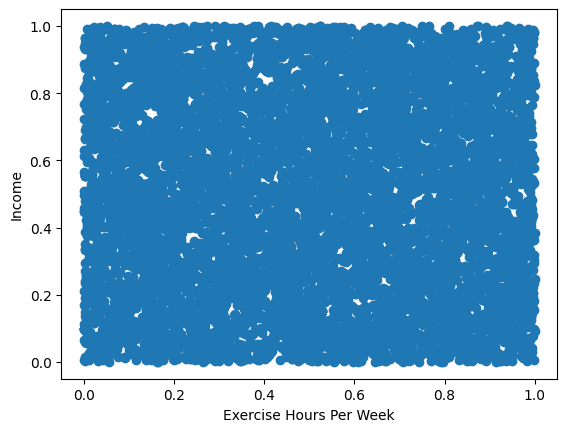

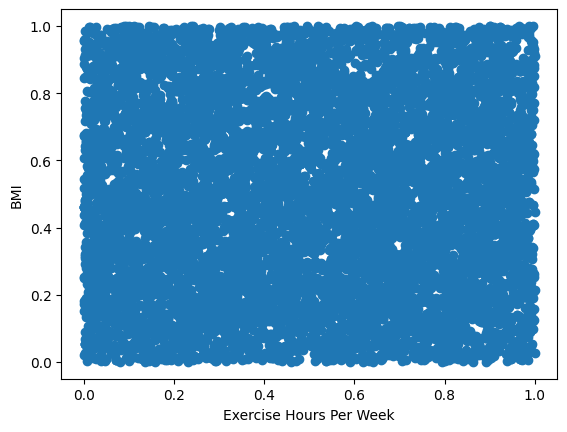

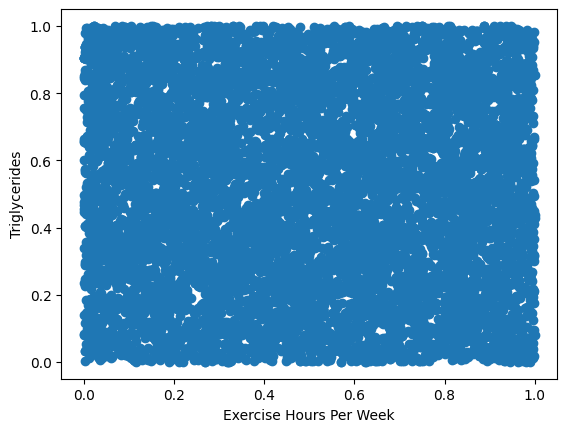

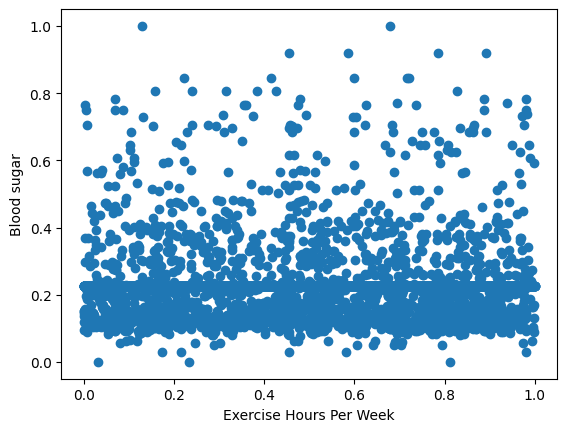

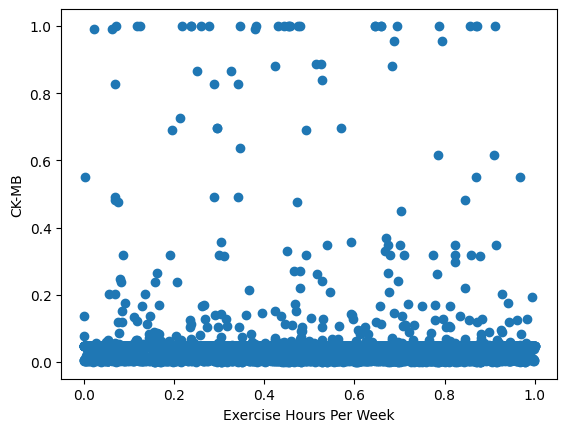

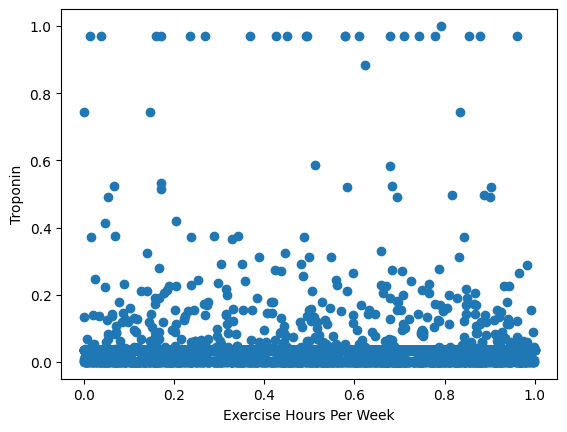

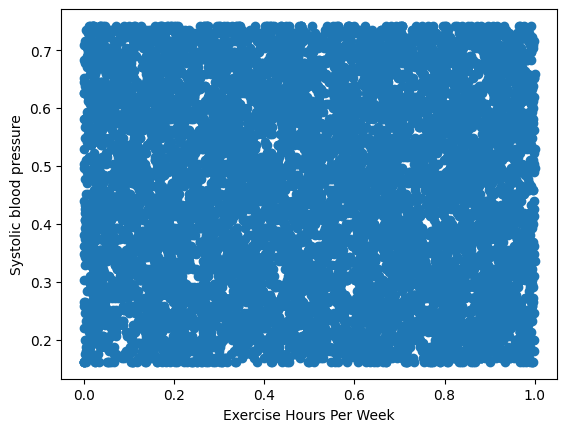

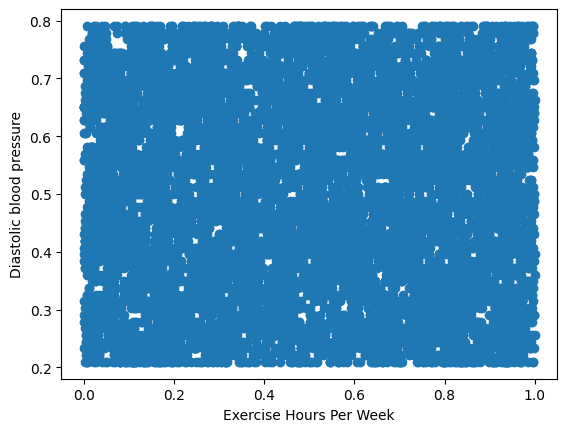

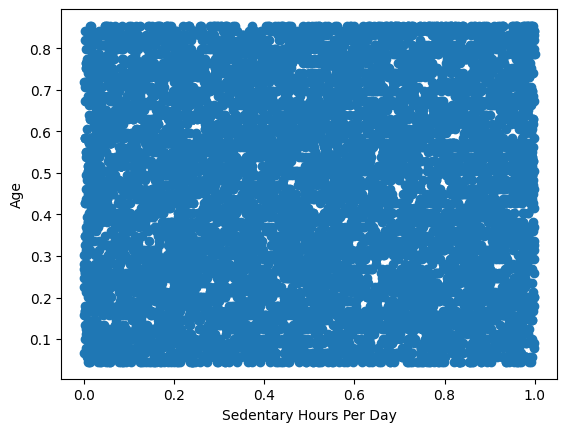

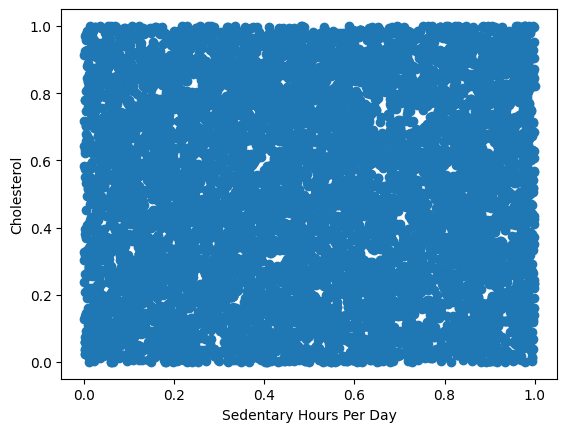

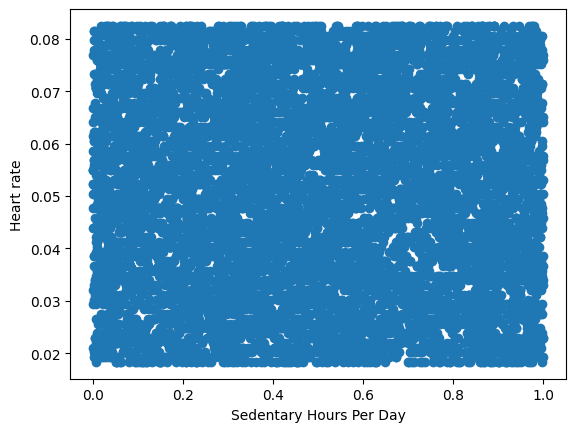

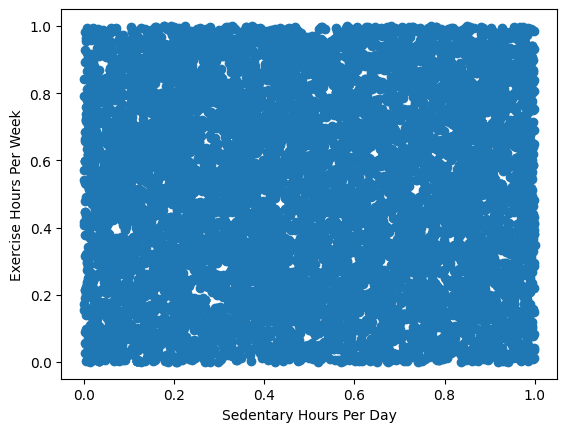

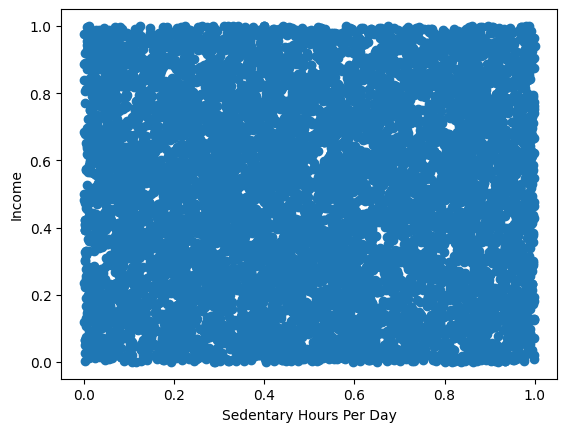

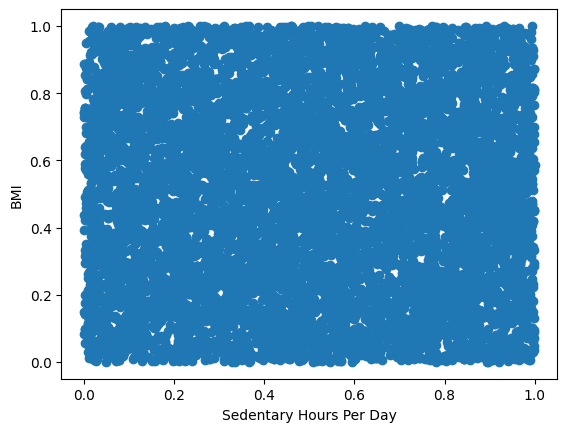

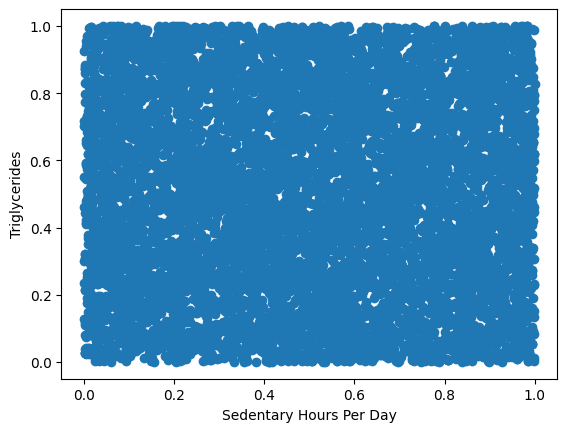

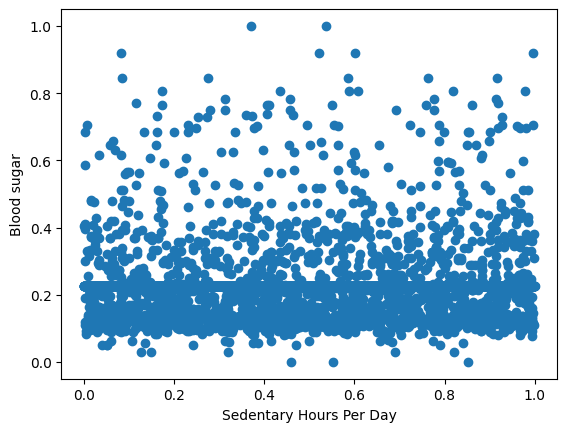

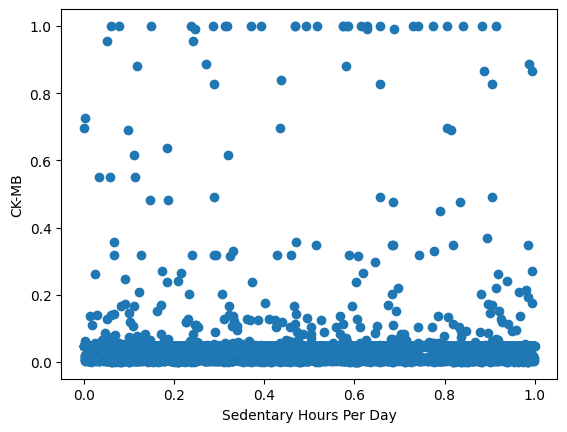

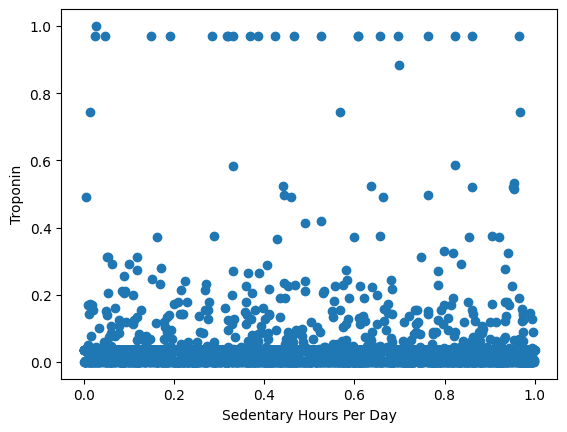

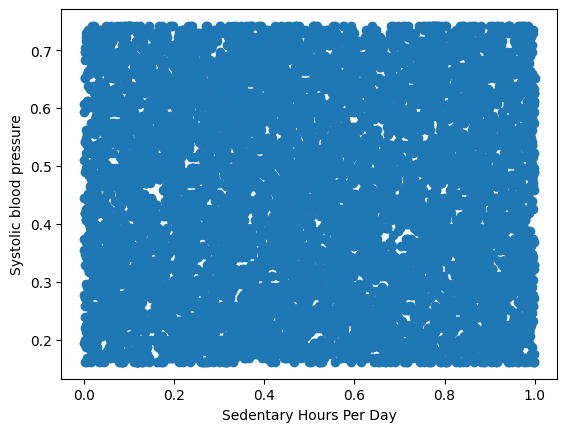

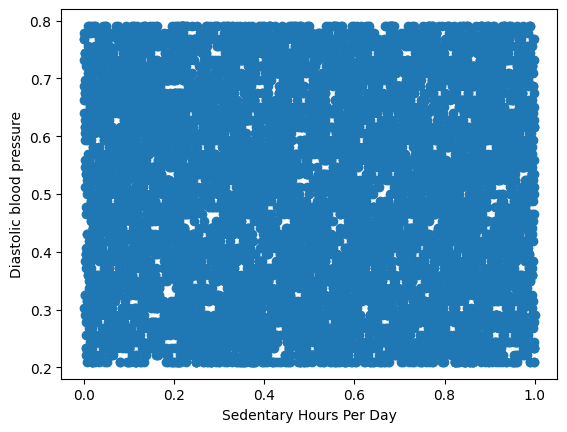

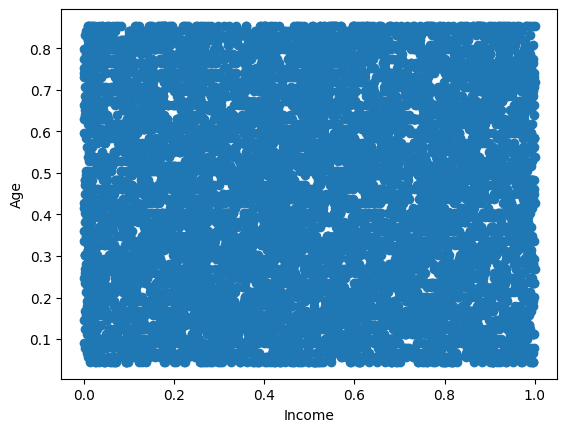

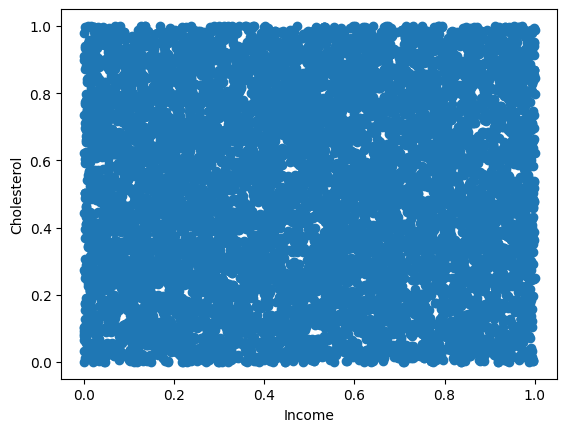

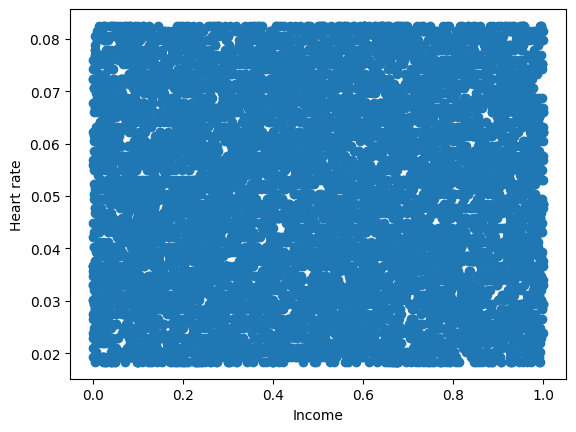

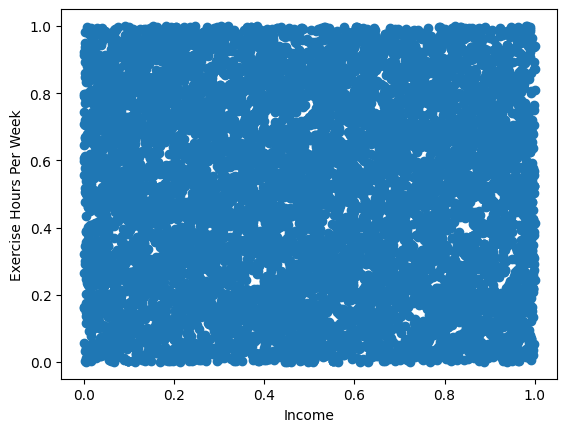

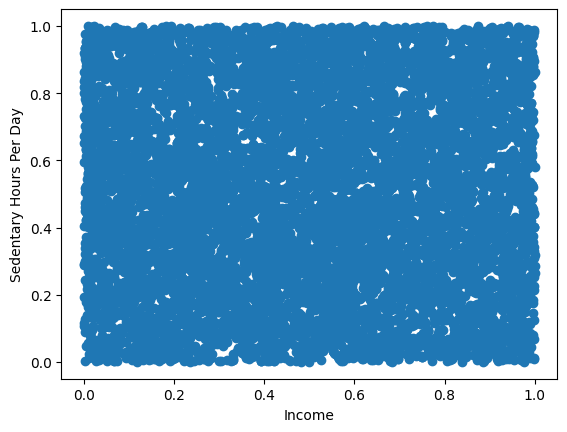

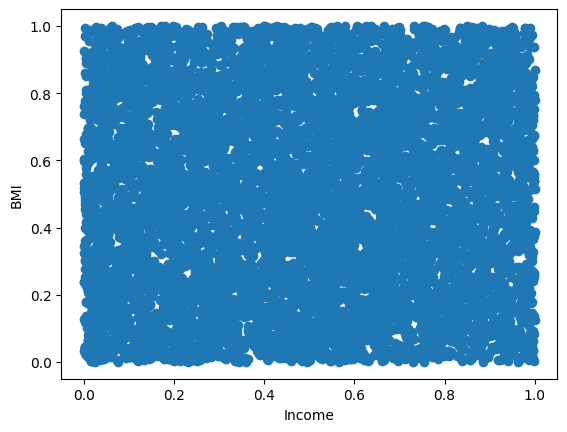

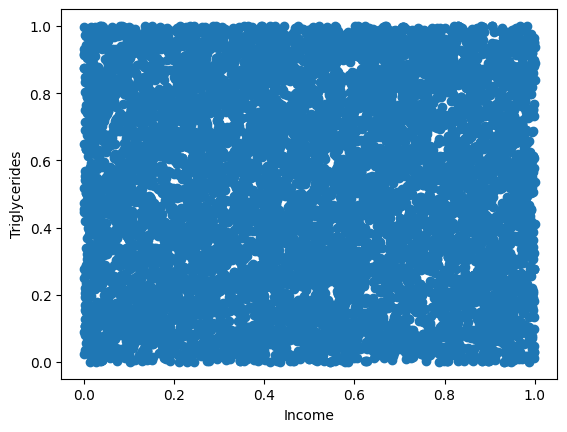

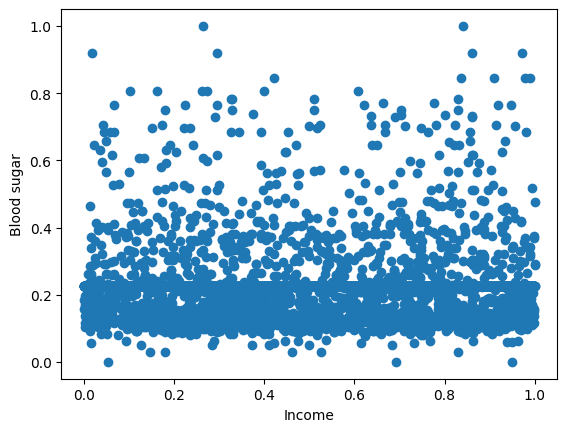

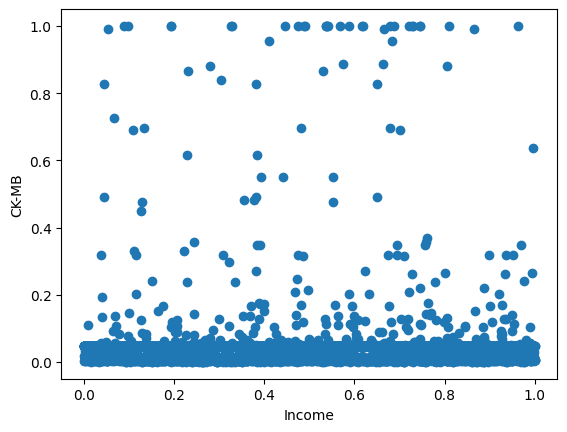

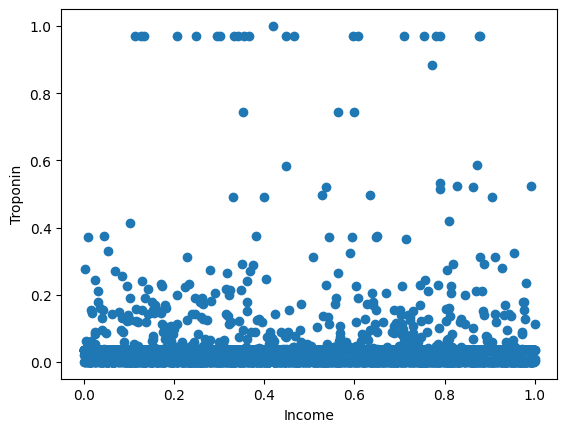

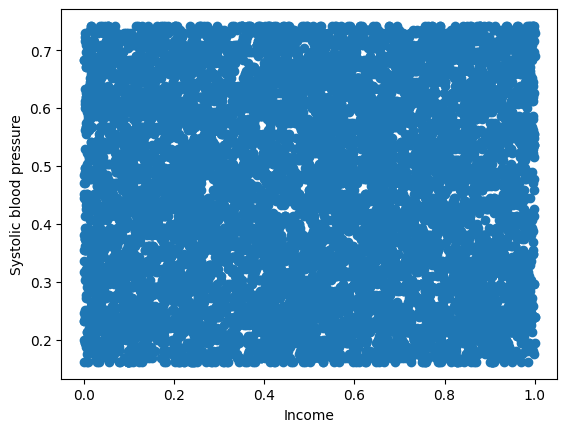

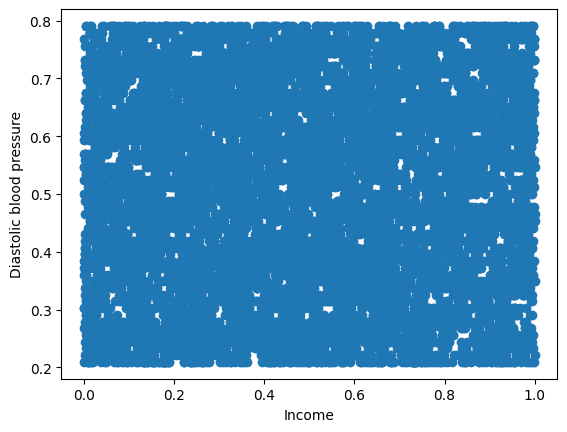

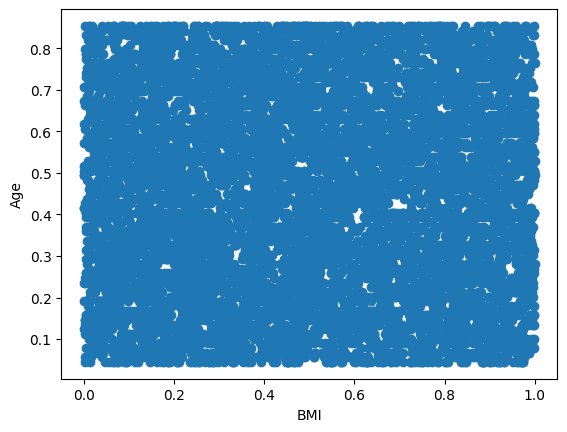

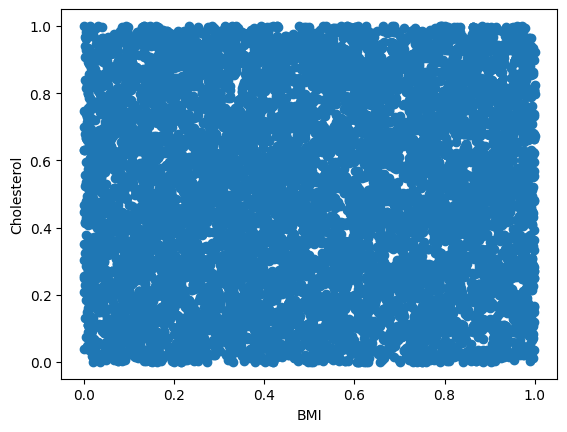

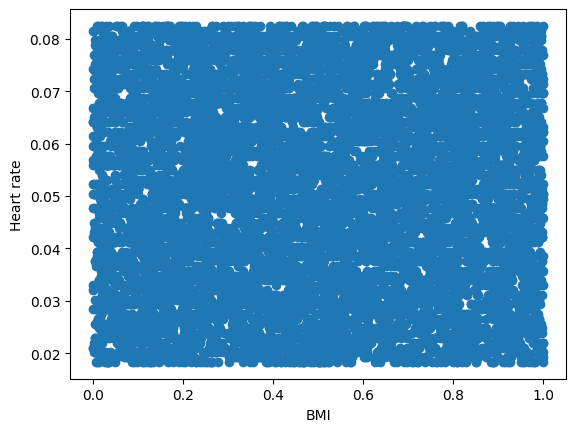

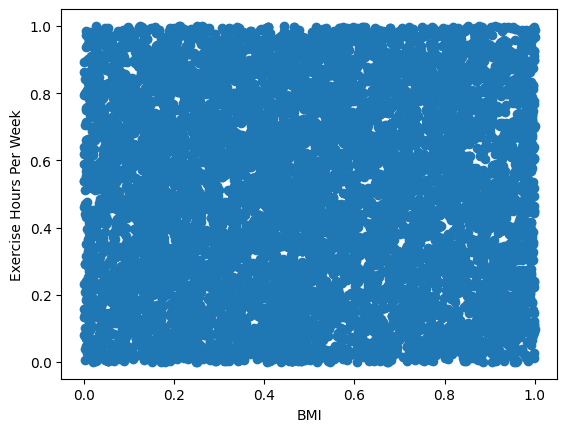

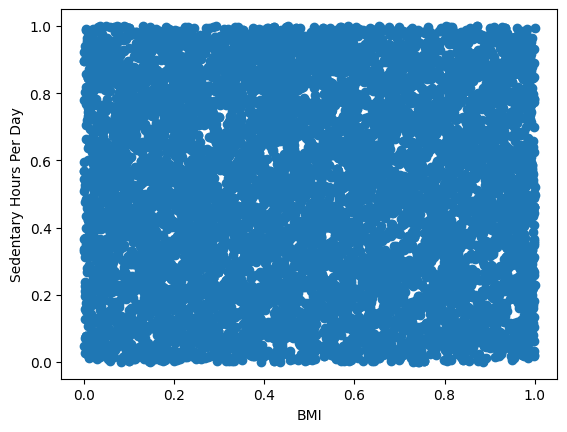

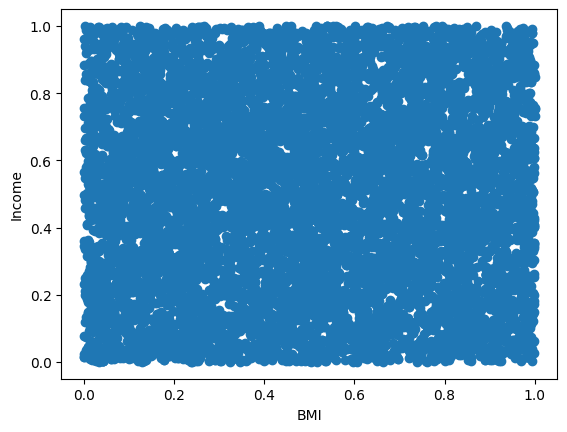

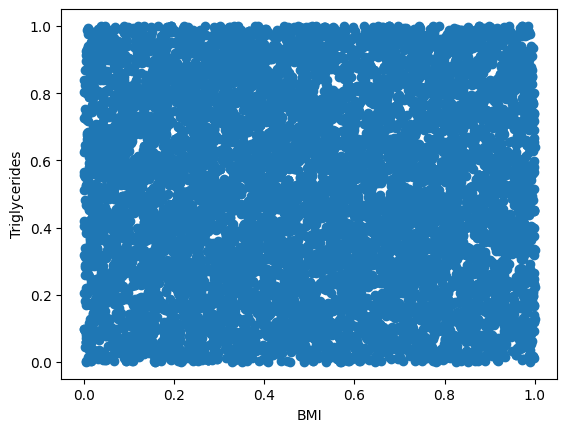

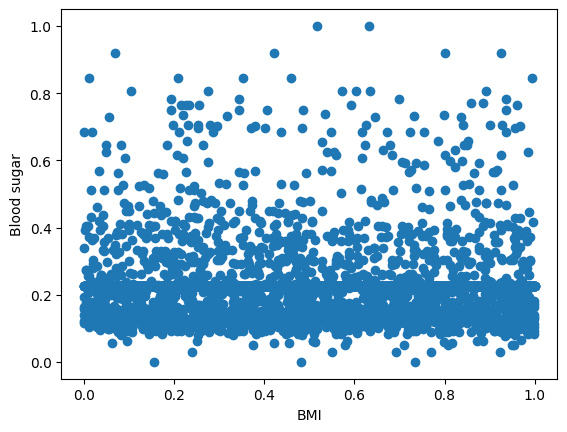

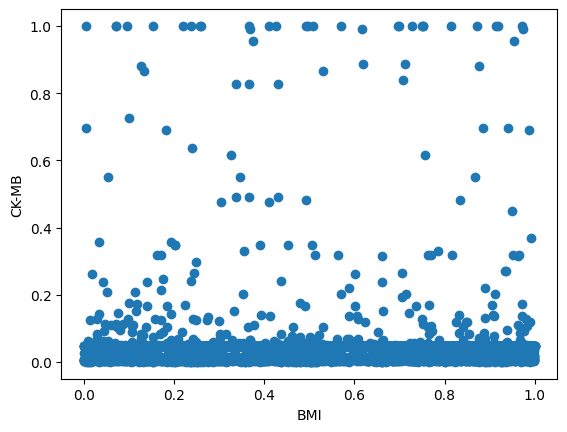

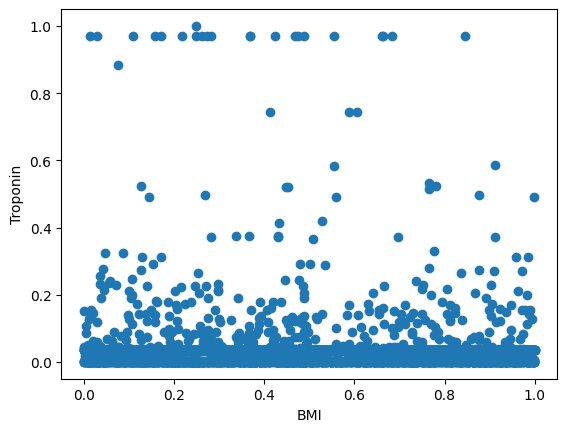

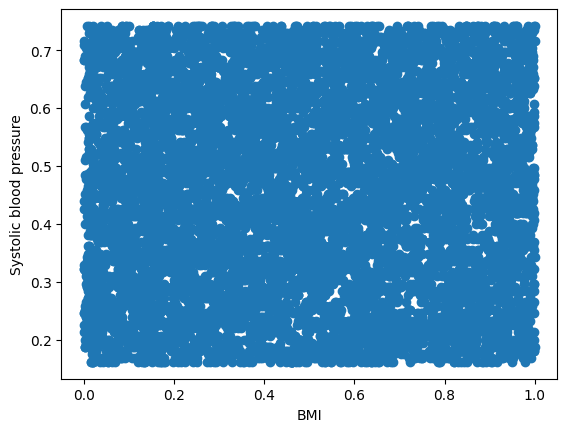

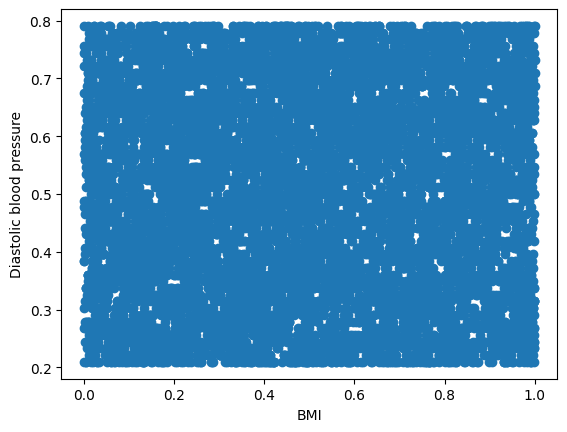

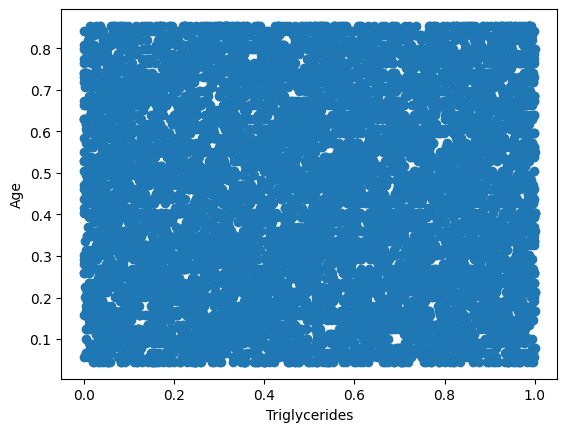

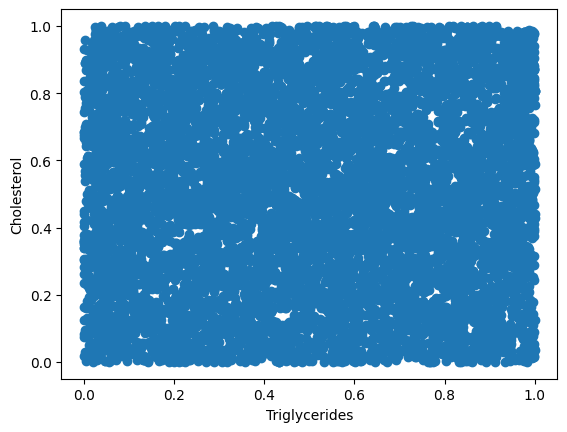

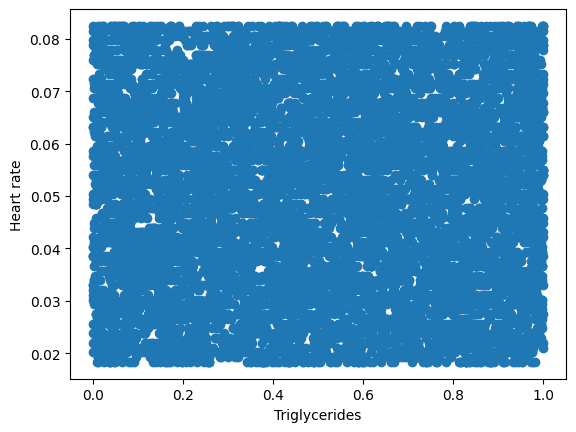

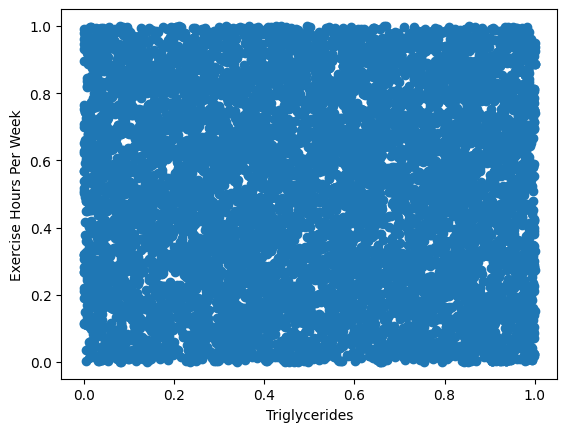

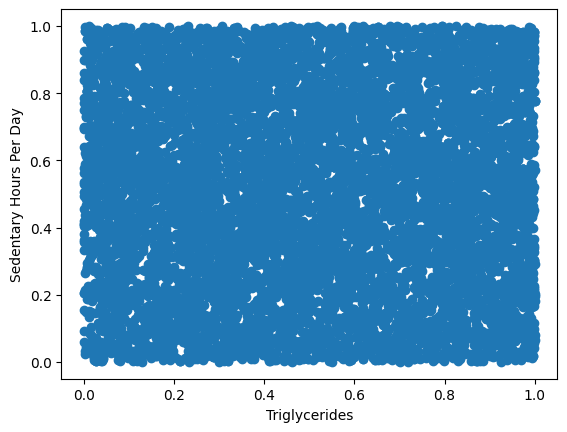

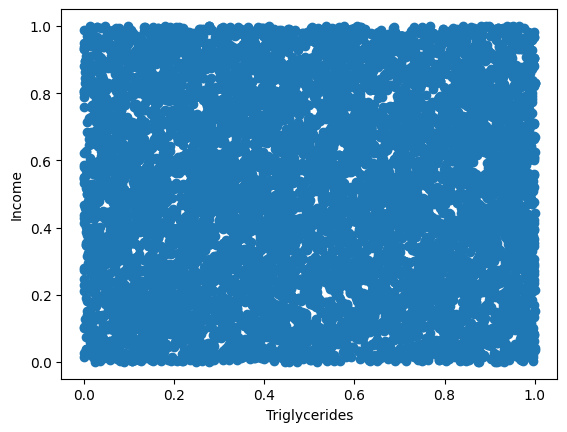

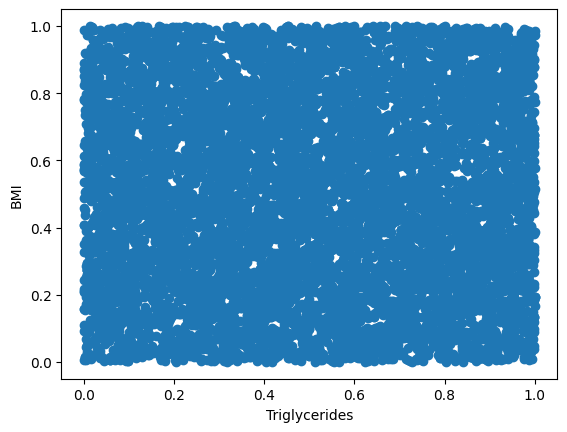

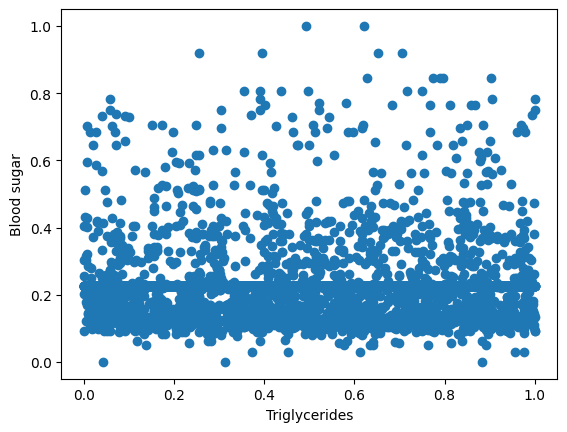

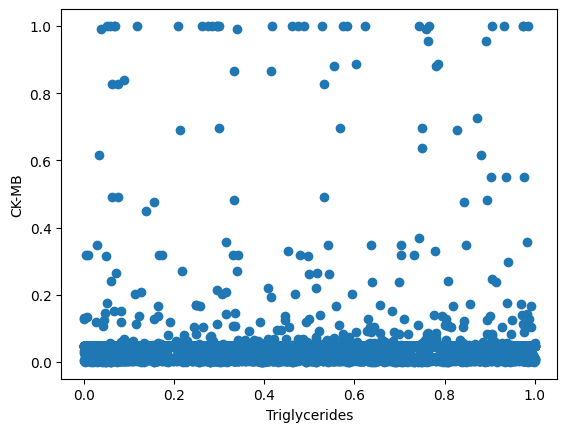

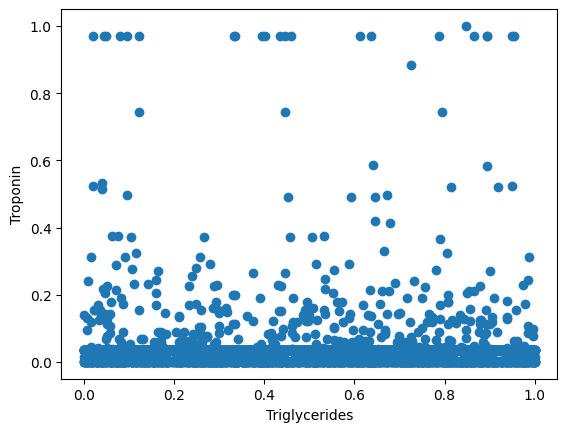

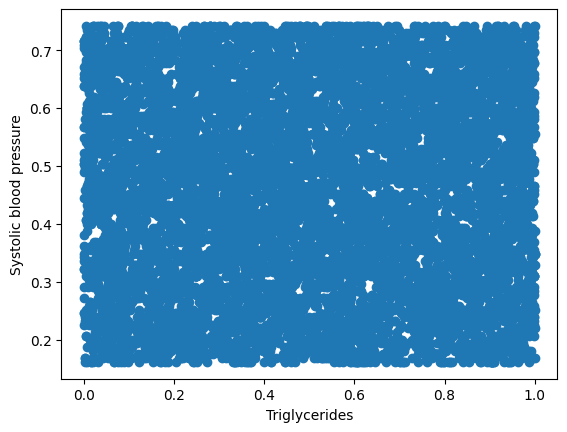

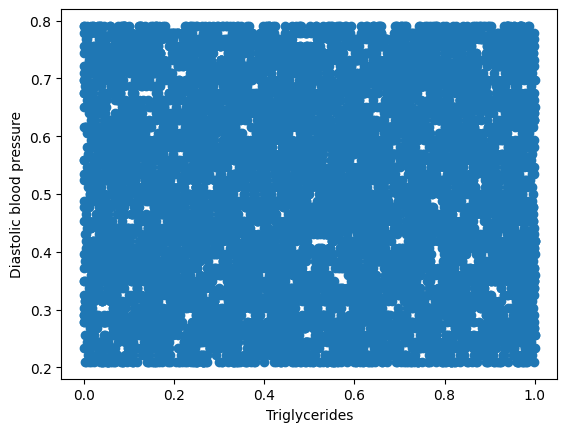

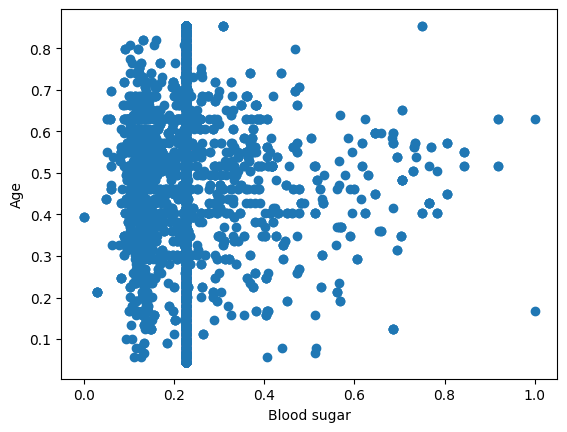

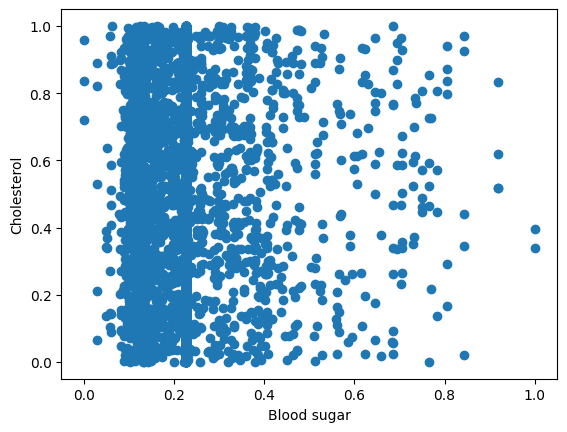

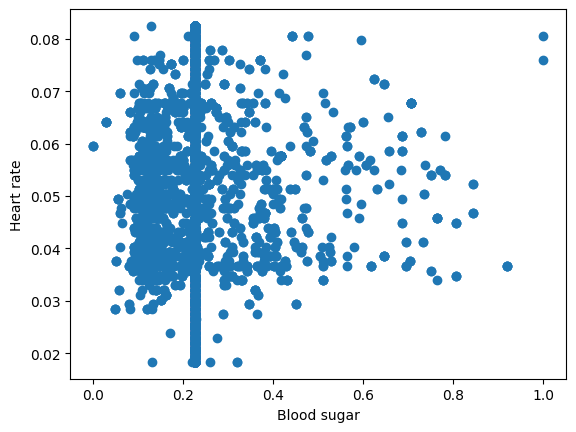

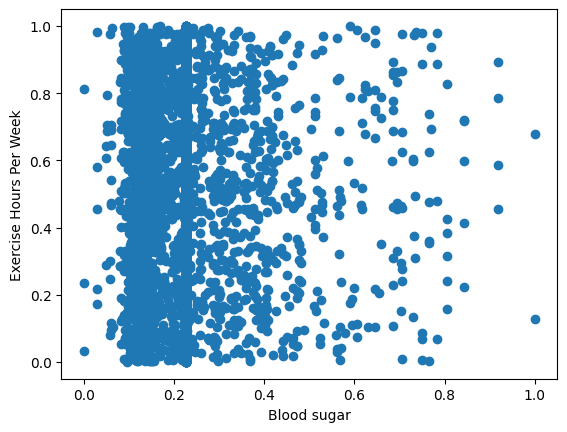

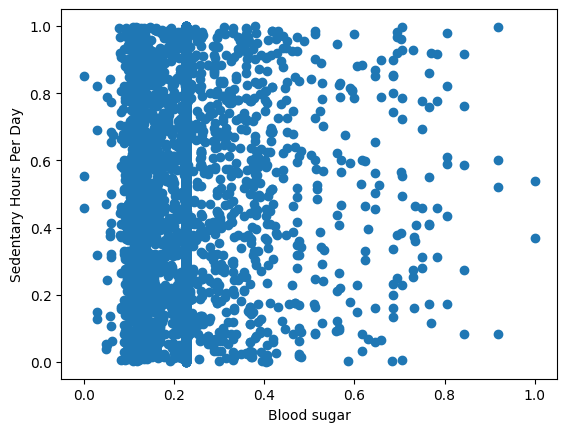

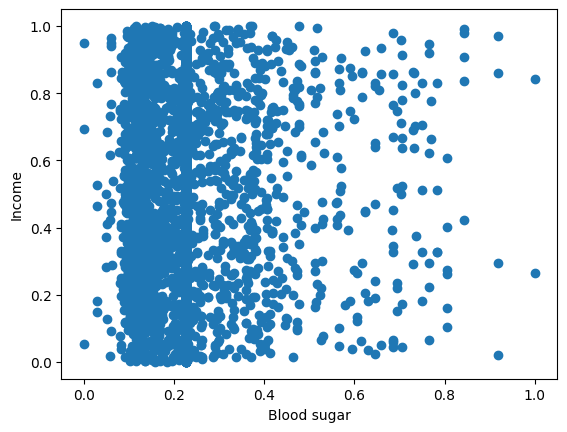

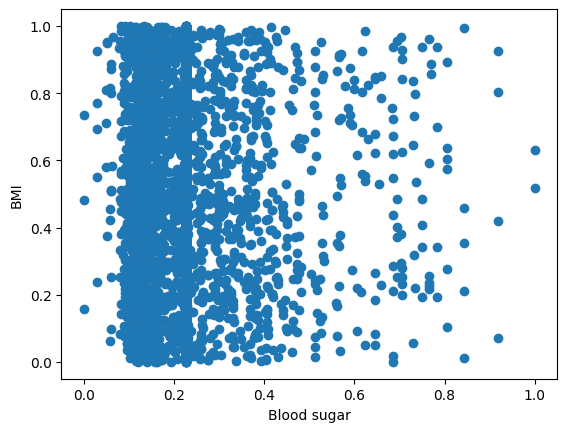

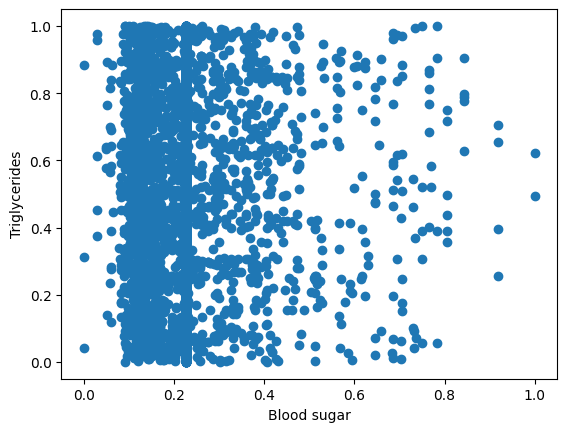

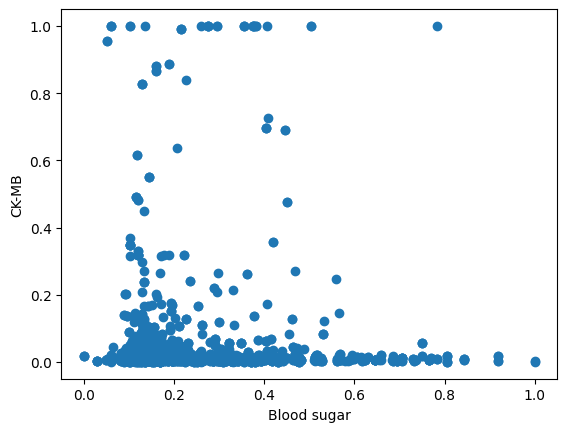

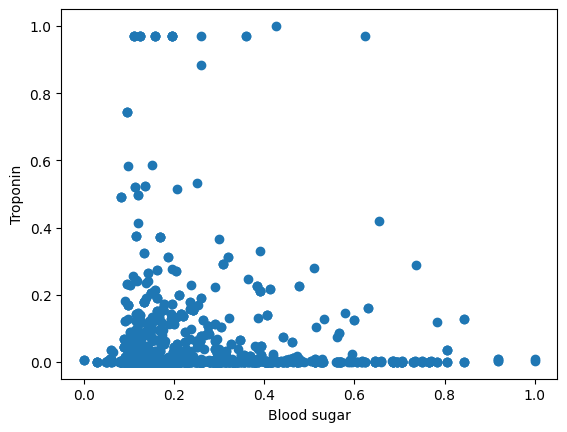

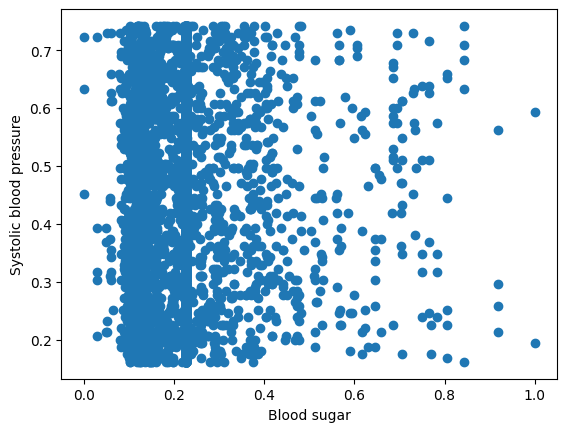

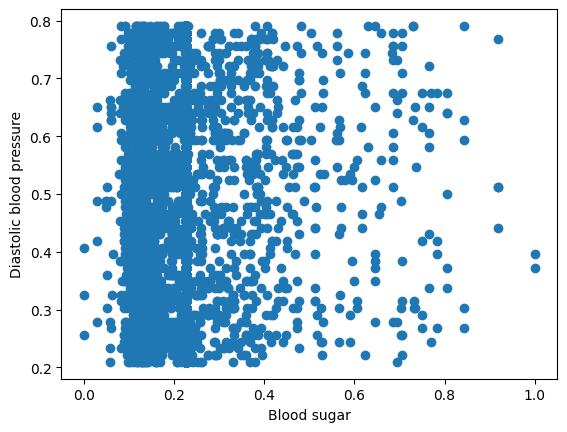

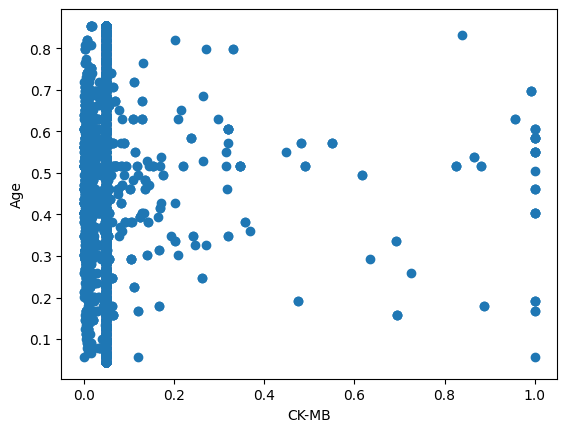

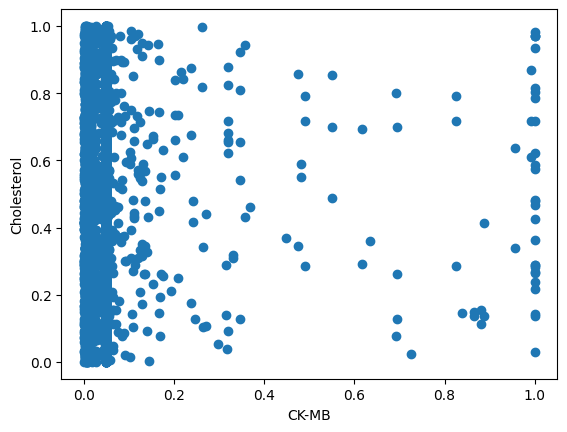

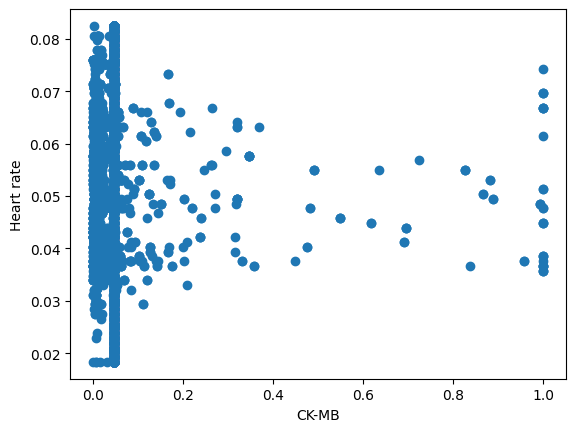

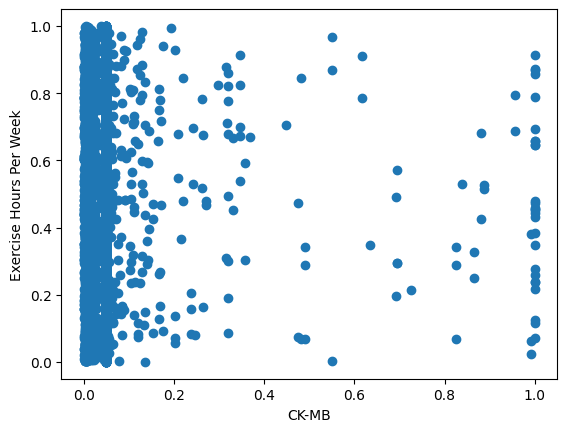

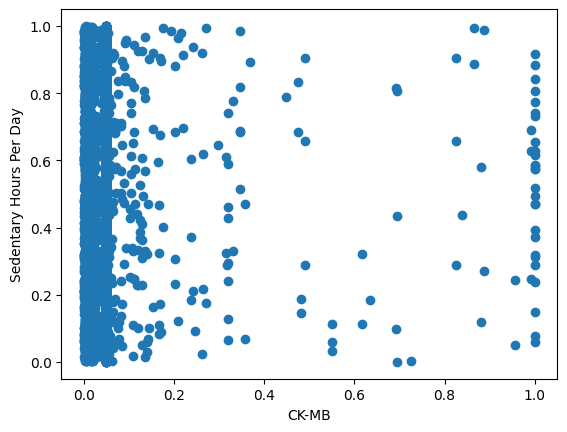

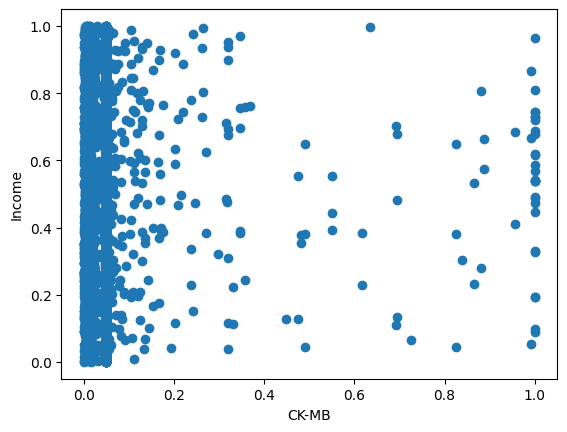

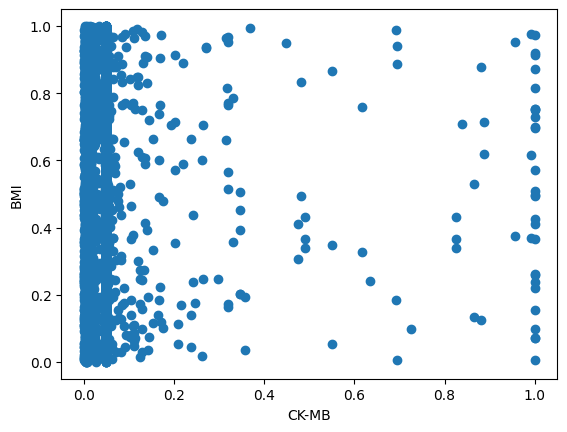

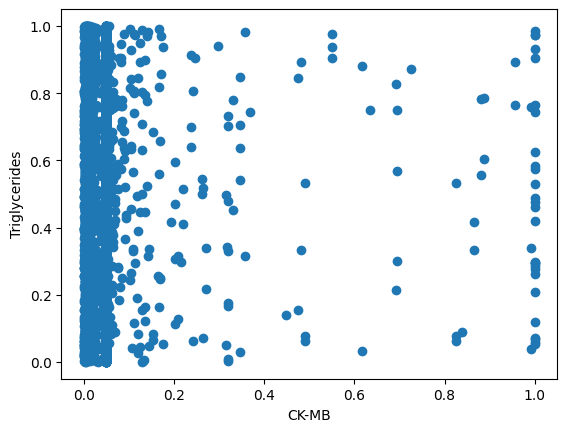

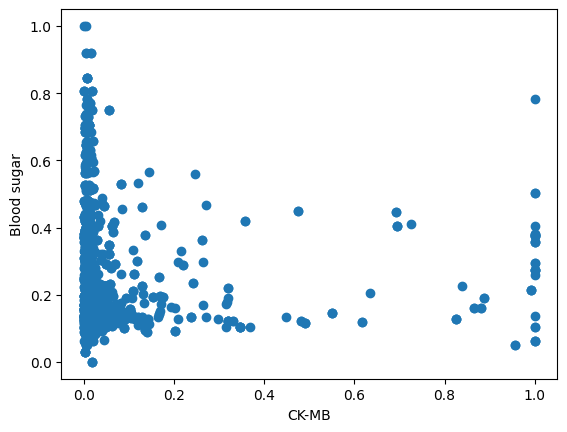

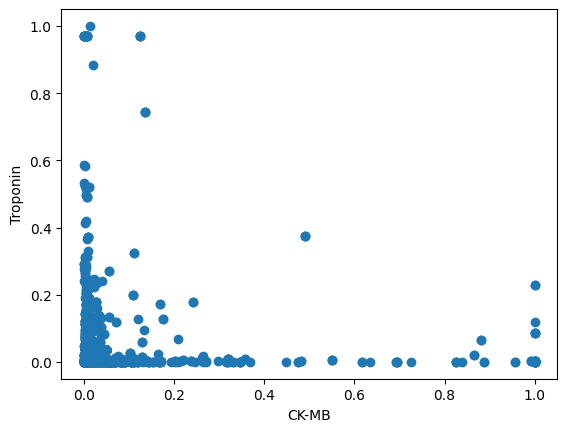

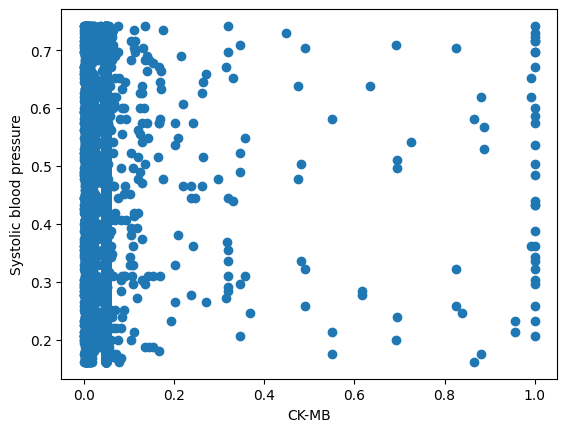

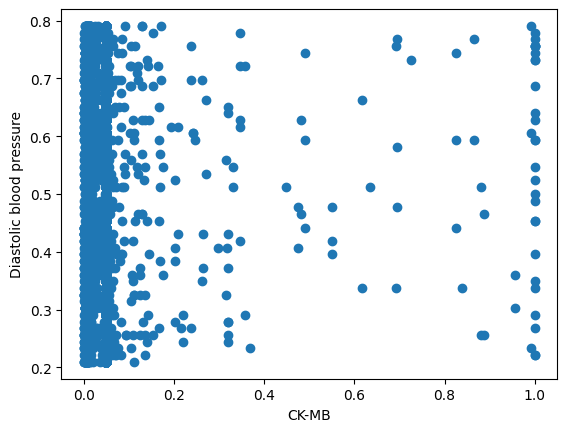

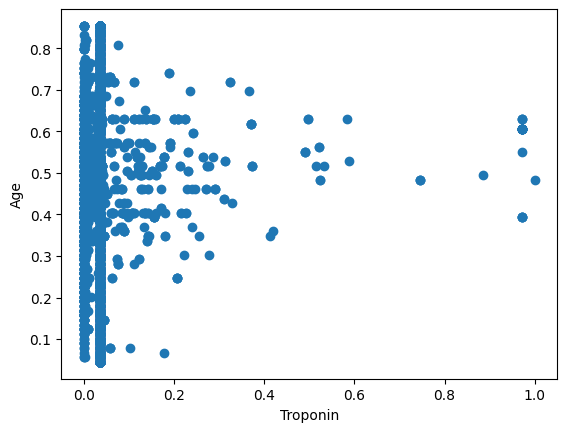

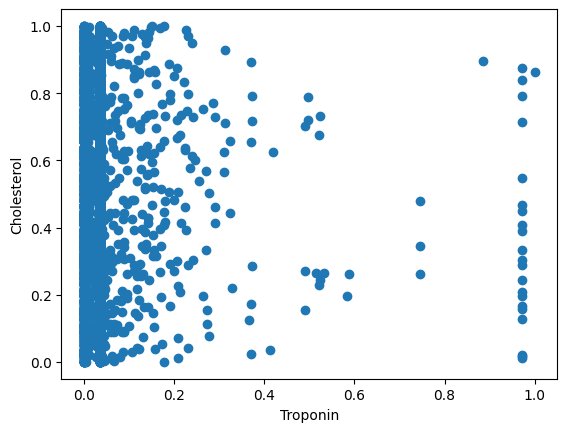

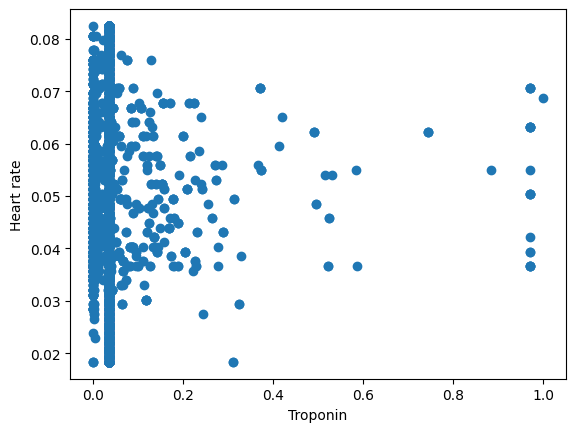

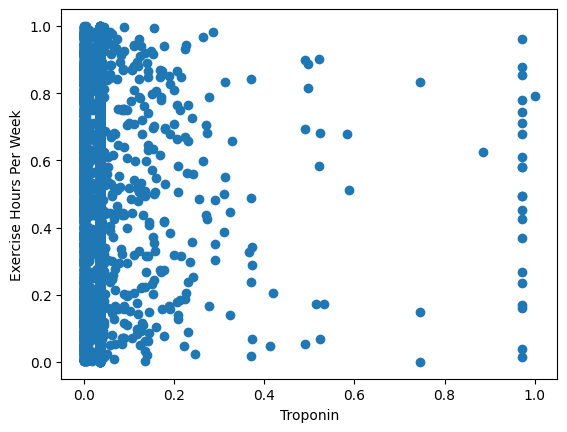

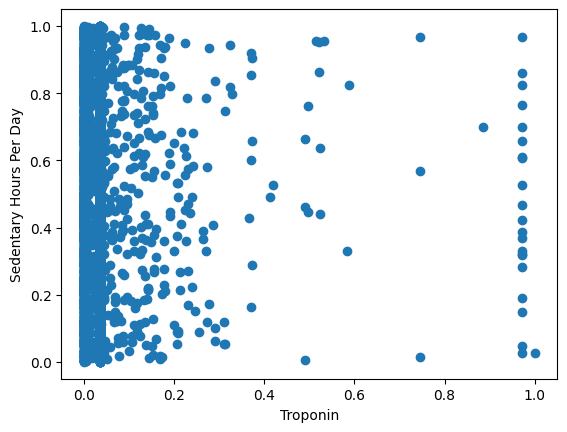

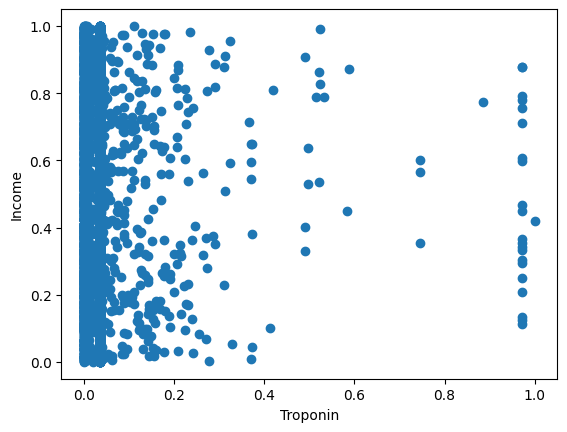

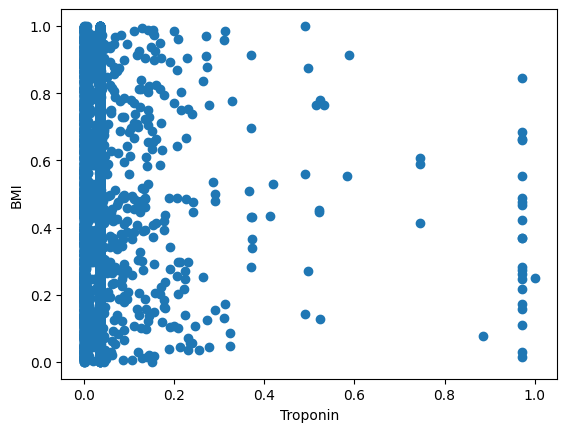

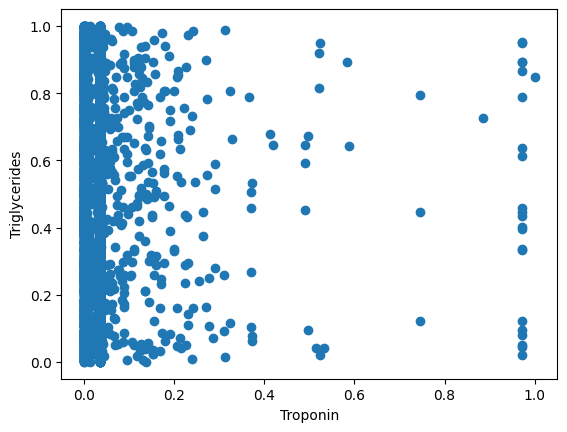

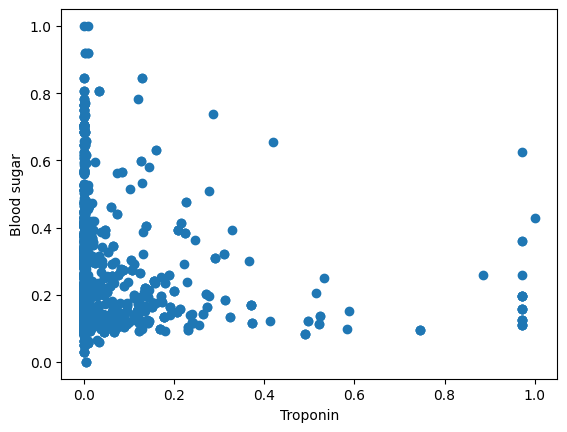

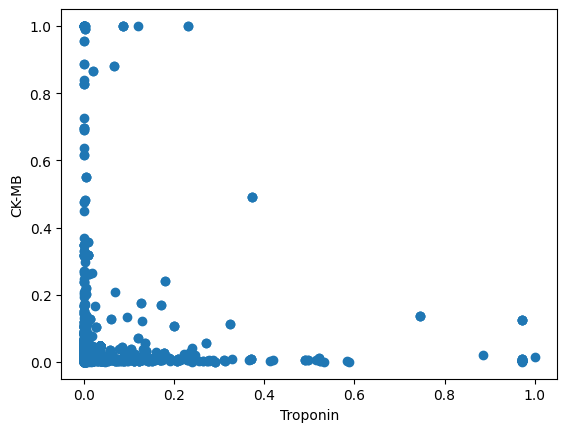

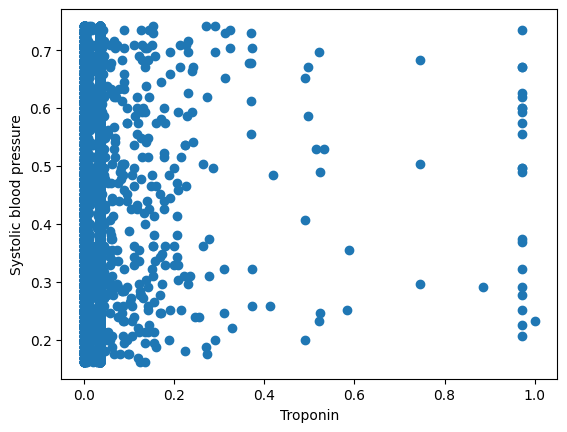

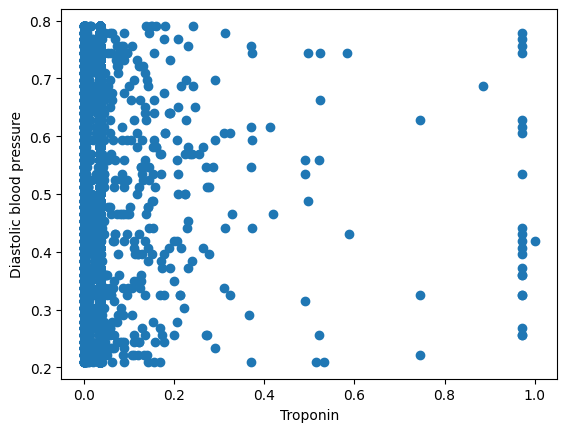

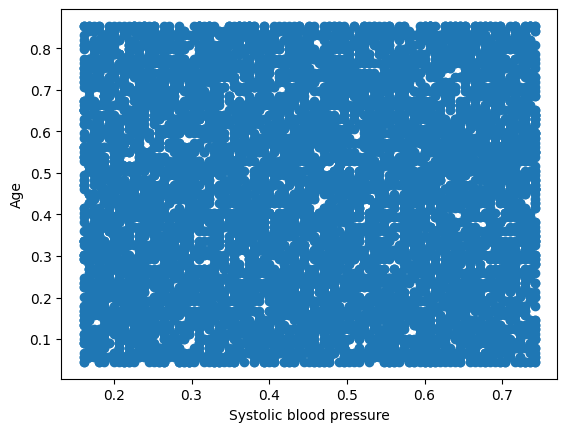

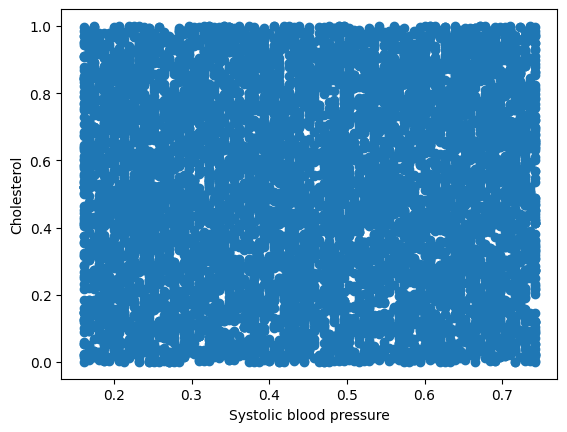

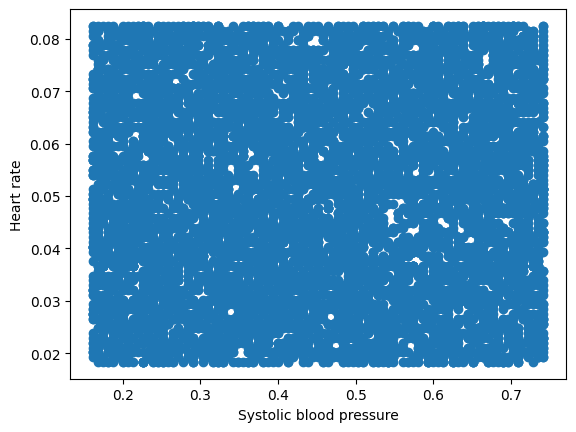

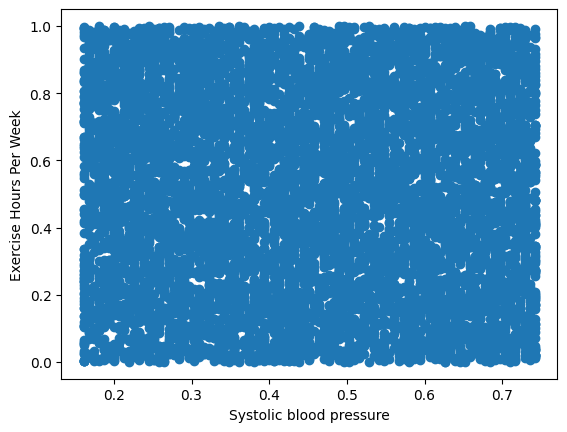

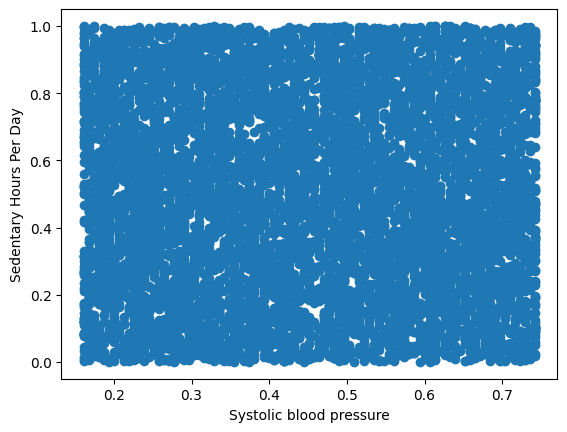

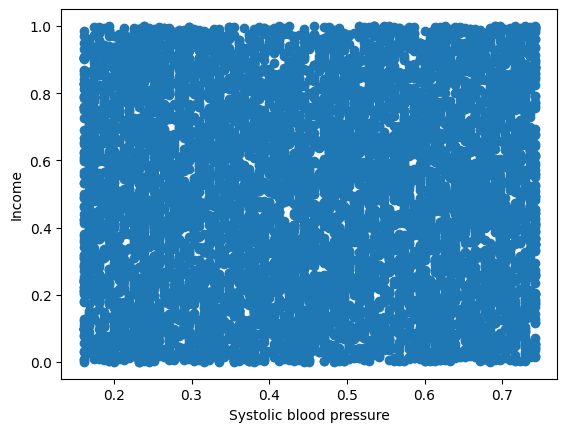

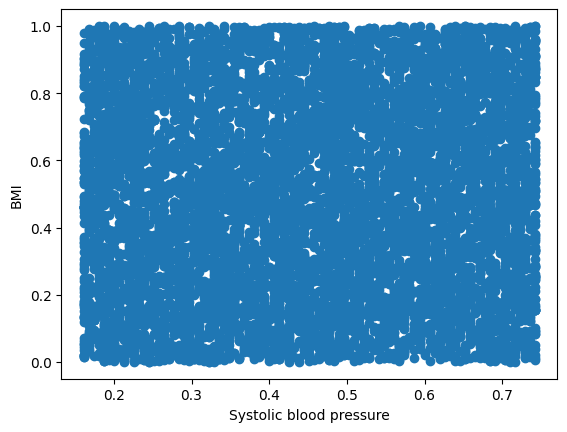

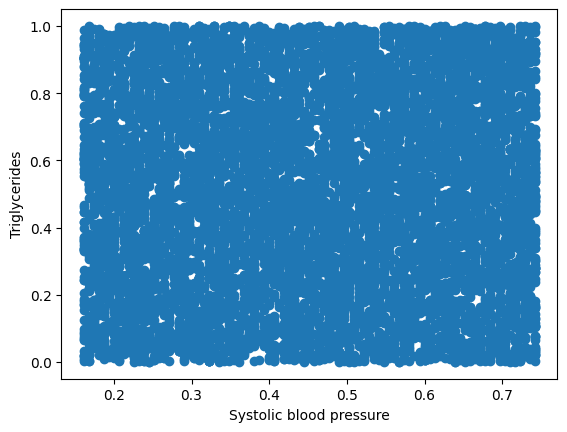

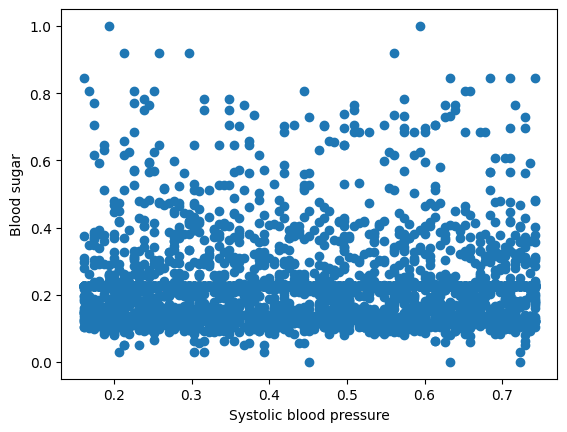

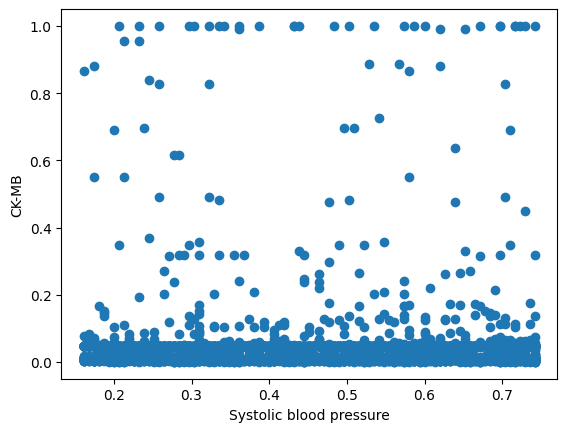

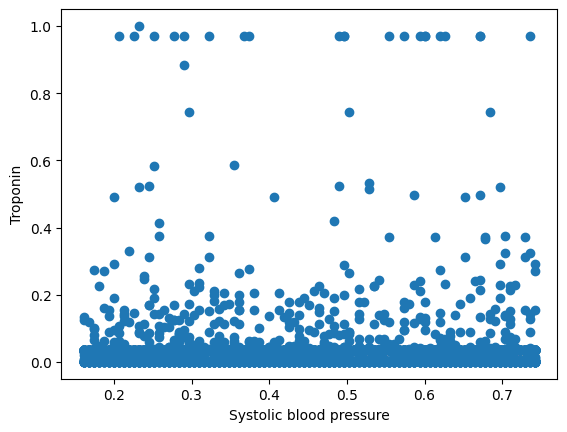

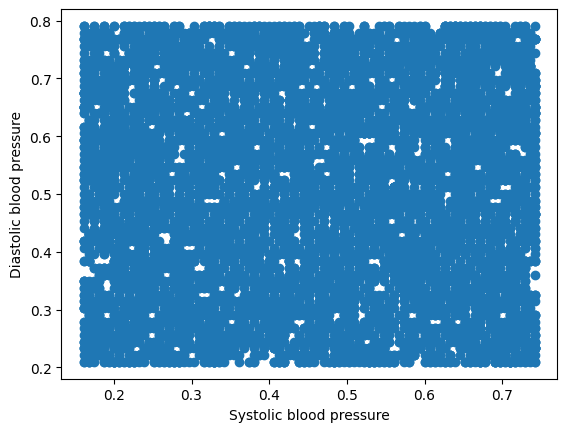

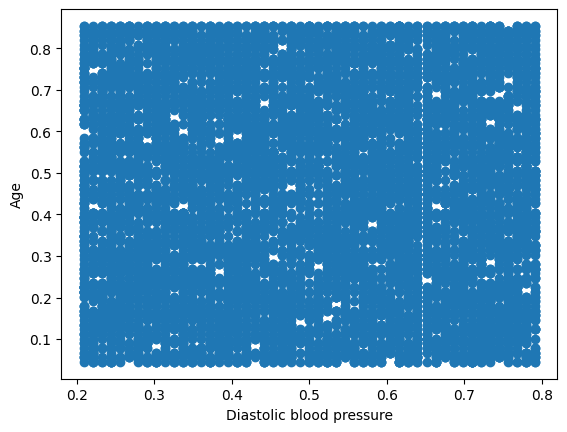

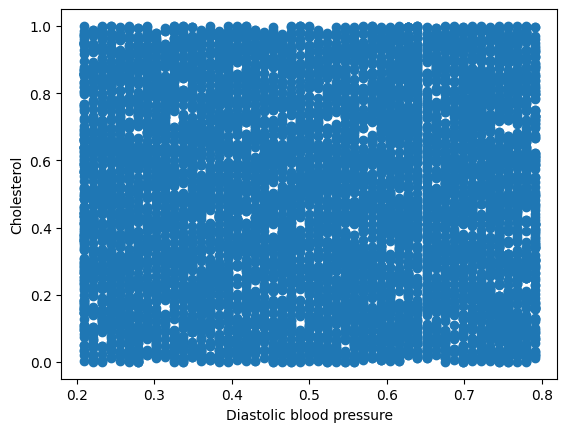

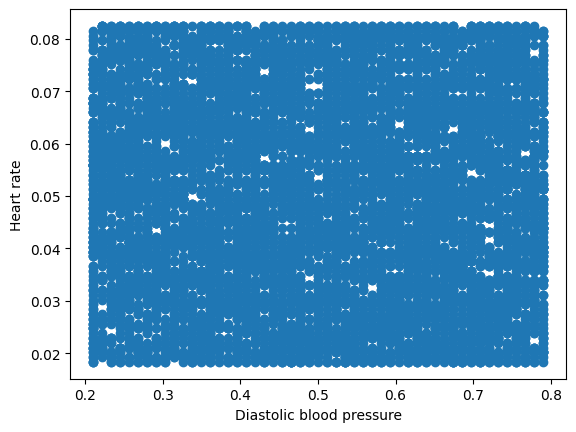

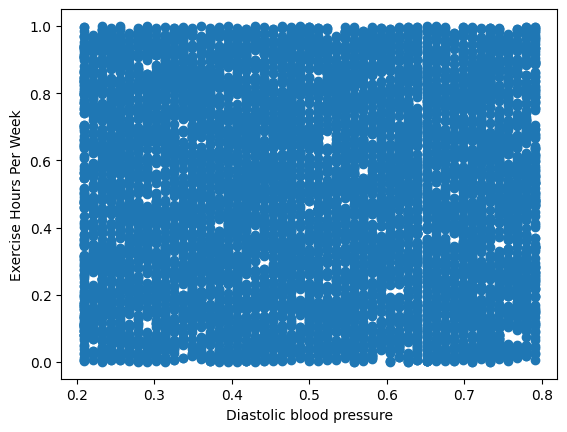

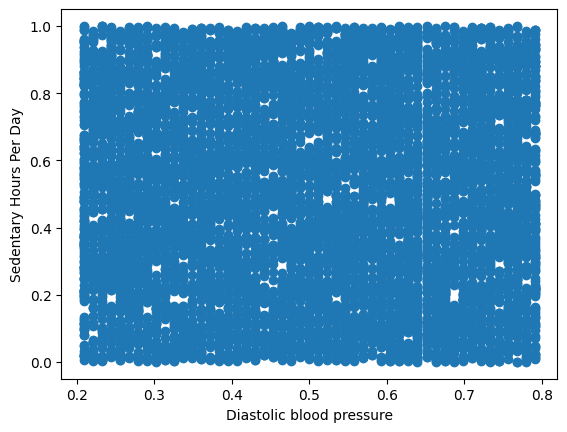

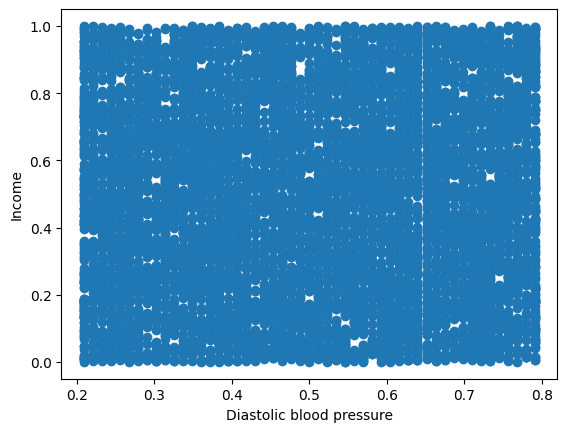

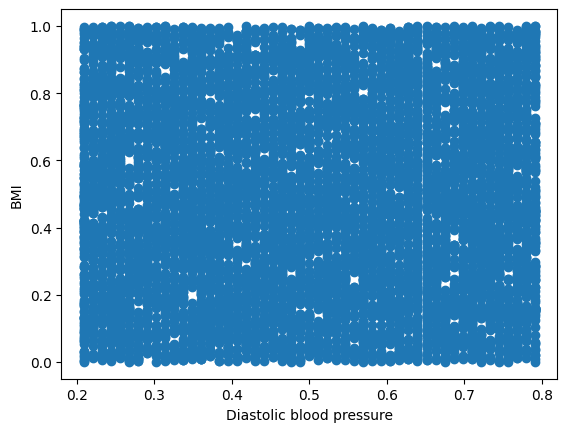

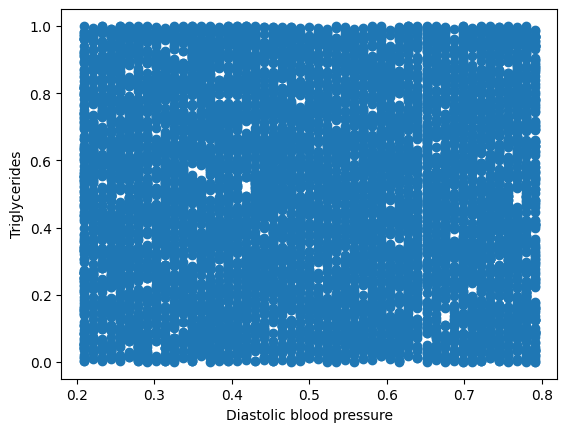

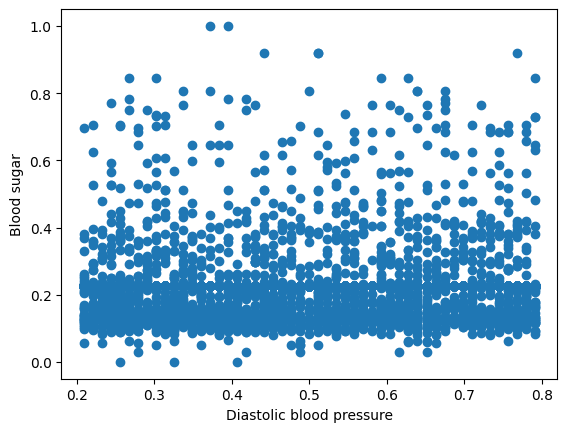

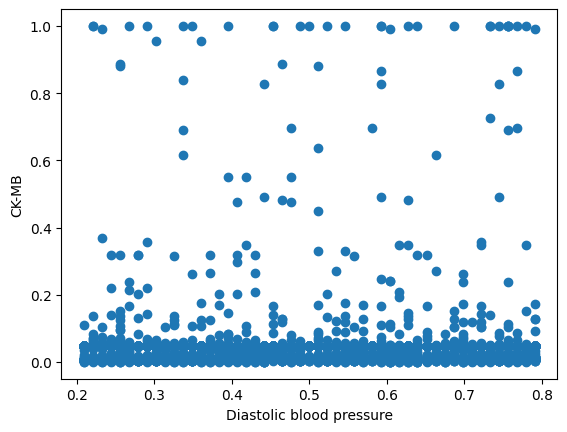

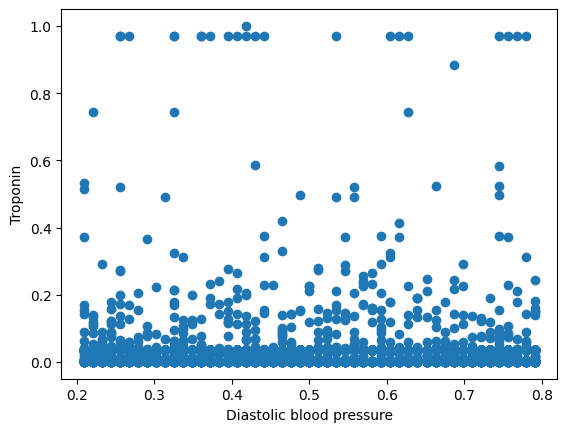

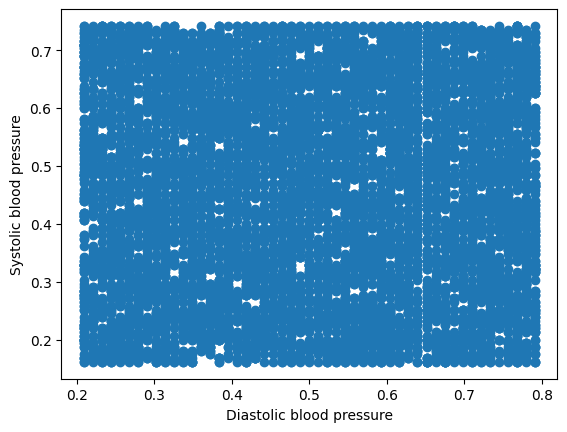

In [14]:
for i in vars_numeric.columns:
  for j in vars_numeric.columns:
    if i != j:
      plt.scatter(vars_numeric[i], vars_numeric[j])
      plt.xlabel(i)
      plt.ylabel(j)
      plt.show()
      print()

Analisis correlacion

In [15]:
vars_numeric.corr()

Age  Cholesterol  Heart rate  \
Age                       1.000000    -0.010564   -0.006540   
Cholesterol              -0.010564     1.000000   -0.002616   
Heart rate               -0.006540    -0.002616    1.000000   
Exercise Hours Per Week   0.004908     0.021311    0.007815   
Sedentary Hours Per Day   0.014658     0.024988   -0.009646   
Income                   -0.001363    -0.002196    0.002155   
BMI                      -0.001736     0.017095   -0.000476   
Triglycerides             0.005680    -0.009309    0.010784   
Blood sugar              -0.007642     0.012527    0.010630   
CK-MB                    -0.005811    -0.002090   -0.003013   
Troponin                  0.029525    -0.019349    0.013075   
Systolic blood pressure   0.001821     0.003987    0.010714   
Diastolic blood pressure -0.011720     0.004152   -0.018586   

                          Exercise Hours Per Week  Sedentary Hours Per Day  \
Age                                      0.004908                 0.014658   
Cholesterol                              0.021311                 0.024988   
Heart rate                               0.007815                -0.009646   
Exercise Hours Per Week                  1.000000                 0.018410   
Sedentary Hours Per Day                  0.018410                 1.000000   
Income                                  -0.018635                 0.013029   
BMI                                      0.006819                -0.000959   
Triglycerides                            0.006867                -0.004630   
Blood sugar                             -0.009195                 0.008883   
CK-MB                                   -0.014563                -0.005972   
Troponin                                -0.004899                -0.003620   
Systolic blood pressure                 -0.016726                 0.008414   
Diastolic blood pressure                -0.007186                 0.000274   

                            Income       BMI  Triglycerides  Blood sugar  \
Age                      -0.001363 -0.001736       0.005680    -0.007642   
Cholesterol              -0.002196  0.017095      -0.009309     0.012527   
Heart rate                0.002155 -0.000476       0.010784     0.010630   
Exercise Hours Per Week  -0.018635  0.006819       0.006867    -0.009195   
Sedentary Hours Per Day   0.013029 -0.000959      -0.004630     0.008883   
Income                    1.000000  0.012121       0.007147     0.011927   
BMI                       0.012121  1.000000      -0.002084    -0.004985   
Triglycerides             0.007147 -0.002084       1.000000     0.010502   
Blood sugar               0.011927 -0.004985       0.010502     1.000000   
CK-MB                     0.001541  0.002524      -0.003839     0.013936   
Troponin                 -0.004524 -0.020761      -0.007726    -0.037505   
Systolic blood pressure   0.006814  0.003961      -0.001441    -0.004377   
Diastolic blood pressure  0.008488  0.001642       0.001431     0.015022   

                             CK-MB  Troponin  Systolic blood pressure  \
Age                      -0.005811  0.029525                 0.001821   
Cholesterol              -0.002090 -0.019349                 0.003987   
Heart rate               -0.003013  0.013075                 0.010714   
Exercise Hours Per Week  -0.014563 -0.004899                -0.016726   
Sedentary Hours Per Day  -0.005972 -0.003620                 0.008414   
Income                    0.001541 -0.004524                 0.006814   
BMI                       0.002524 -0.020761                 0.003961   
Triglycerides            -0.003839 -0.007726                -0.001441   
Blood sugar               0.013936 -0.037505                -0.004377   
CK-MB                     1.000000 -0.003377                 0.009390   
Troponin                 -0.003377  1.000000                 0.004027   
Systolic blood pressure   0.009390  0.004027                 1.000000   
Diastolic blood pressure  0.014615 -0.005

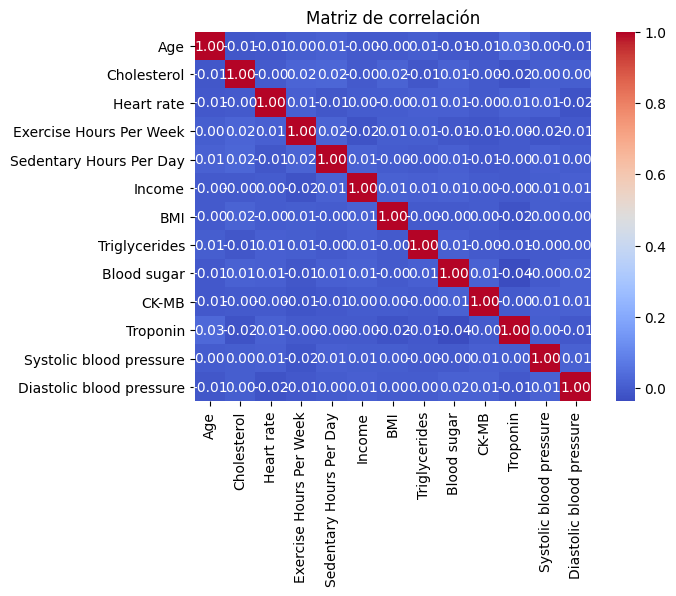

In [16]:
correlation_matrix = vars_numeric.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlación")
plt.show()

procesamiento de datos

Mapeamos el genero para pasar los valores a numericos

In [17]:
Gender_map = {'Male':2, 'Female':1}
df['Gender'] = df['Gender'].map(Gender_map)



Normalización

In [18]:
df

Age  Cholesterol  Heart rate  Diabetes  Family History  Smoking  \
0     0.595506     0.314286    0.047663       0.0             0.0      1.0   
1     0.595506     0.096429    0.047663       1.0             1.0      1.0   
2     0.595506     0.189286    0.047663       0.0             0.0      1.0   
3     0.078652     0.960714    0.071494       1.0             1.0      1.0   
4     0.078652     0.792857    0.071494       1.0             0.0      1.0   
...        ...          ...         ...       ...             ...      ...   
9372  0.685393     0.200000    0.053162       0.0             0.0      1.0   
9373  0.741573     0.939286    0.065078       1.0             1.0      1.0   
9374  0.516854     0.003571    0.037580       1.0             1.0      1.0   
9375  0.516854     0.003571    0.037580       1.0             1.0      1.0   
9376  0.370787     0.464286    0.077910       0.0             1.0      1.0   

      Obesity  Alcohol Consumption  Exercise Hours Per Week  Diet  ...  \
0         0.0                  0.0                 0.208326     0  ...   
1         1.0                  1.0                 0.752420     1  ...   
2         0.0                  1.0                 0.200998     2  ...   
3         1.0                  1.0                 0.090557     2  ...   
4         1.0                  0.0                 0.601030     2  ...   
...       ...                  ...                      ...   ...  ...   
9372      1.0                  1.0                 0.919174     1  ...   
9373      0.0                  1.0                 0.304067     1  ...   
9374      0.0                  1.0                 0.395819     1  ...   
9375      0.0                  1.0                 0.395819     1  ...   
9376      1.0                  1.0                 0.157329     0  ...   

      Physical Activity Days Per Week  Sleep Hours Per Day  \
0                                 0.0             0.333333   
1                                 2.0             0.666667   
2                                 4.0             1.000000   
3                                 1.0             0.500000   
4                                 1.0             0.166667   
...                               ...                  ...   
9372                              5.0             0.666667   
9373                              3.0             0.000000   
9374                              7.0             0.500000   
9375                              7.0             0.500000   
9376                              4.0             0.000000   

      Heart Attack Risk (Binary)  Blood sugar     CK-MB  Troponin  \
0                            0.0     0.227018  0.048229  0.036512   
1                            0.0     0.227018  0.048229  0.036512   
2                            0.0     0.227018  0.048229  0.036512   
3                            0.0     0.227018  0.048229  0.036512   
4                            0.0     0.227018  0.048229  0.036512   
...                          ...          ...       ...       ...   
9372                         1.0     0.227018  0.048229  0.036512   
9373                         1.0     0.227018  0.048229  0.036512   
9374                         0.0     0.112648  0.145185  0.000680   
9375                         0.0     0.511858  0.007872  0.000388   
9376                         1.0     0.227018  0.048229  0.036512   

      Heart Attack Risk (Text)  Gender  Systolic blood pressure  \
0                            0       2                 0.600000   
1                            0       2                 0.574194   
2                            0       2                 0.187097   
3                            0       2                 0.645161   
4                            0       2                 0.251613   
...                        ...     ...                      ...   
9372                         0       2                 0.238710   
9373                         0       1                 0.567742   
9374    

In [19]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(vars_numeric)
vars_numeric_norm = pd.DataFrame(scaled_df)

vars_numeric_norm.columns = vars_numeric.columns





In [20]:
for col in df.columns:
    if col in vars_numeric_norm.columns:
        df[col] = vars_numeric_norm[col]
df

Age  Cholesterol  Heart rate  Diabetes  Family History  Smoking  \
0     0.680556     0.314286    0.457143       0.0             0.0      1.0   
1     0.680556     0.096429    0.457143       1.0             1.0      1.0   
2     0.680556     0.189286    0.457143       0.0             0.0      1.0   
3     0.041667     0.960714    0.828571       1.0             1.0      1.0   
4     0.041667     0.792857    0.828571       1.0             0.0      1.0   
...        ...          ...         ...       ...             ...      ...   
9372  0.791667     0.200000    0.542857       0.0             0.0      1.0   
9373  0.861111     0.939286    0.728571       1.0             1.0      1.0   
9374  0.583333     0.003571    0.300000       1.0             1.0      1.0   
9375  0.583333     0.003571    0.300000       1.0             1.0      1.0   
9376  0.402778     0.464286    0.928571       0.0             1.0      1.0   

      Obesity  Alcohol Consumption  Exercise Hours Per Week  Diet  ...  \
0         0.0                  0.0                 0.208326     0  ...   
1         1.0                  1.0                 0.752420     1  ...   
2         0.0                  1.0                 0.200998     2  ...   
3         1.0                  1.0                 0.090557     2  ...   
4         1.0                  0.0                 0.601030     2  ...   
...       ...                  ...                      ...   ...  ...   
9372      1.0                  1.0                 0.919174     1  ...   
9373      0.0                  1.0                 0.304067     1  ...   
9374      0.0                  1.0                 0.395819     1  ...   
9375      0.0                  1.0                 0.395819     1  ...   
9376      1.0                  1.0                 0.157329     0  ...   

      Physical Activity Days Per Week  Sleep Hours Per Day  \
0                                 0.0             0.333333   
1                                 2.0             0.666667   
2                                 4.0             1.000000   
3                                 1.0             0.500000   
4                                 1.0             0.166667   
...                               ...                  ...   
9372                              5.0             0.666667   
9373                              3.0             0.000000   
9374                              7.0             0.500000   
9375                              7.0             0.500000   
9376                              4.0             0.000000   

      Heart Attack Risk (Binary)  Blood sugar     CK-MB  Troponin  \
0                            0.0     0.227018  0.048229  0.036512   
1                            0.0     0.227018  0.048229  0.036512   
2                            0.0     0.227018  0.048229  0.036512   
3                            0.0     0.227018  0.048229  0.036512   
4                            0.0     0.227018  0.048229  0.036512   
...                          ...          ...       ...       ...   
9372                         1.0     0.227018  0.048229  0.036512   
9373                         1.0     0.227018  0.048229  0.036512   
9374                         0.0     0.112648  0.145185  0.000680   
9375                         0.0     0.511858  0.007872  0.000388   
9376                         1.0     0.227018  0.048229  0.036512   

      Heart Attack Risk (Text)  Gender  Systolic blood pressure  \
0                            0       2                 0.755556   
1                            0       2                 0.711111   
2                            0       2                 0.044444   
3                            0       2                 0.833333   
4                            0       2                 0.155556   
...                        ...     ...                      ...   
9372                         0       2                 0.133333   
9373                         0       1                 0.700000   
9374    

In [21]:
column_names = df.columns
print(column_names)
y = pd.DataFrame()
y = df['Diabetes']
X = pd.DataFrame()
for i in column_names:
    if i != 'Diabetes':
        X[i] = df[i]


Index(['Age', 'Cholesterol', 'Heart rate', 'Diabetes', 'Family History',
       'Smoking', 'Obesity', 'Alcohol Consumption', 'Exercise Hours Per Week',
       'Diet', 'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day',
       'Heart Attack Risk (Binary)', 'Blood sugar', 'CK-MB', 'Troponin',
       'Heart Attack Risk (Text)', 'Gender', 'Systolic blood pressure',
       'Diastolic blood pressure'],
      dtype='object')


In [22]:
X

Age  Cholesterol  Heart rate  Family History  Smoking  Obesity  \
0     0.680556     0.314286    0.457143             0.0      1.0      0.0   
1     0.680556     0.096429    0.457143             1.0      1.0      1.0   
2     0.680556     0.189286    0.457143             0.0      1.0      0.0   
3     0.041667     0.960714    0.828571             1.0      1.0      1.0   
4     0.041667     0.792857    0.828571             0.0      1.0      1.0   
...        ...          ...         ...             ...      ...      ...   
9372  0.791667     0.200000    0.542857             0.0      1.0      1.0   
9373  0.861111     0.939286    0.728571             1.0      1.0      0.0   
9374  0.583333     0.003571    0.300000             1.0      1.0      0.0   
9375  0.583333     0.003571    0.300000             1.0      1.0      0.0   
9376  0.402778     0.464286    0.928571             1.0      1.0      1.0   

      Alcohol Consumption  Exercise Hours Per Week  Diet  \
0                     0.0                 0.208326     0   
1                     1.0                 0.752420     1   
2                     1.0                 0.200998     2   
3                     1.0                 0.090557     2   
4                     0.0                 0.601030     2   
...                   ...                      ...   ...   
9372                  1.0                 0.919174     1   
9373                  1.0                 0.304067     1   
9374                  1.0                 0.395819     1   
9375                  1.0                 0.395819     1   
9376                  1.0                 0.157329     0   

      Previous Heart Problems  ...  Physical Activity Days Per Week  \
0                         0.0  ...                              0.0   
1                         0.0  ...                              2.0   
2                         1.0  ...                              4.0   
3                         1.0  ...                              1.0   
4                         1.0  ...                              1.0   
...                       ...  ...                              ...   
9372                      0.0  ...                              5.0   
9373                      1.0  ...                              3.0   
9374                      1.0  ...                              7.0   
9375                      1.0  ...                              7.0   
9376                      1.0  ...                              4.0   

      Sleep Hours Per Day  Heart Attack Risk (Binary)  Blood sugar     CK-MB  \
0                0.333333                         0.0     0.227018  0.048229   
1                0.666667                         0.0     0.227018  0.048229   
2                1.000000                         0.0     0.227018  0.048229   
3                0.500000                         0.0     0.227018  0.048229   
4                0.166667                         0.0     0.227018  0.048229   
...                   ...                         ...          ...       ...   
9372             0.666667                         1.0     0.227018  0.048229   
9373             0.000000                         1.0     0.227018  0.048229   
9374             0.500000                         0.0     0.112648  0.145185   
9375             0.500000                         0.0     0.511858  0.007872   
9376             0.000000                         1.0     0.227018  0.048229   

      Troponin  Heart Attack Risk (Text)  Gender  Systolic blood pressure  \
0     0.036512                         0       2                 0.755556   
1     0.036512                         0       2                 0.711111   
2     0.036512                         0       2                 0.044444   
3     0.036512                         0       2                 0.833333   
4     0.036512                         0       2                 0.155556   
...        ...                       ...     ...                      ...   
9372  0.0365

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

KNN

In [24]:
#ENTRENAR EL MODELO KNeighbors

from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors= 500)

model.fit(X_train, y_train) #Modelo supervisado -> Usamos x e y

y_pred = model.predict(X_test) #Le paso solo la X porque solo quiero predecir la Y

evaluacion

In [25]:

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)


0.6577825159914712

Lineal regresion

In [26]:

yR = pd.DataFrame(df['Cholesterol'])
XR = pd.DataFrame()
for i in column_names:
    if i != 'Cholesterol':
        XR[i] = df[i]

In [27]:
from sklearn.model_selection import train_test_split

X_trainR, X_testR, y_trainR, y_testR = train_test_split(XR, yR, test_size=0.3, random_state=0)

In [35]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_trainR, y_trainR)
y_predR = model.predict(X_testR)


In [29]:
y_testR

Cholesterol
1718     0.214286
5386     0.410714
8081     0.471429
1817     0.592857
4041     0.385714
...           ...
2399     0.557143
4319     0.157143
7056     0.667857
5495     0.889286
976      0.860714

[2814 rows x 1 columns]

In [30]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_testR, y_predR)
r2 = r2_score(y_testR, y_predR)
print("MSE:", mse)
print("R2:", r2)


MSE: 0.07920538895423702
R2: -0.0014290037198370076


In [31]:
df

Age  Cholesterol  Heart rate  Diabetes  Family History  Smoking  \
0     0.680556     0.314286    0.457143       0.0             0.0      1.0   
1     0.680556     0.096429    0.457143       1.0             1.0      1.0   
2     0.680556     0.189286    0.457143       0.0             0.0      1.0   
3     0.041667     0.960714    0.828571       1.0             1.0      1.0   
4     0.041667     0.792857    0.828571       1.0             0.0      1.0   
...        ...          ...         ...       ...             ...      ...   
9372  0.791667     0.200000    0.542857       0.0             0.0      1.0   
9373  0.861111     0.939286    0.728571       1.0             1.0      1.0   
9374  0.583333     0.003571    0.300000       1.0             1.0      1.0   
9375  0.583333     0.003571    0.300000       1.0             1.0      1.0   
9376  0.402778     0.464286    0.928571       0.0             1.0      1.0   

      Obesity  Alcohol Consumption  Exercise Hours Per Week  Diet  ...  \
0         0.0                  0.0                 0.208326     0  ...   
1         1.0                  1.0                 0.752420     1  ...   
2         0.0                  1.0                 0.200998     2  ...   
3         1.0                  1.0                 0.090557     2  ...   
4         1.0                  0.0                 0.601030     2  ...   
...       ...                  ...                      ...   ...  ...   
9372      1.0                  1.0                 0.919174     1  ...   
9373      0.0                  1.0                 0.304067     1  ...   
9374      0.0                  1.0                 0.395819     1  ...   
9375      0.0                  1.0                 0.395819     1  ...   
9376      1.0                  1.0                 0.157329     0  ...   

      Physical Activity Days Per Week  Sleep Hours Per Day  \
0                                 0.0             0.333333   
1                                 2.0             0.666667   
2                                 4.0             1.000000   
3                                 1.0             0.500000   
4                                 1.0             0.166667   
...                               ...                  ...   
9372                              5.0             0.666667   
9373                              3.0             0.000000   
9374                              7.0             0.500000   
9375                              7.0             0.500000   
9376                              4.0             0.000000   

      Heart Attack Risk (Binary)  Blood sugar     CK-MB  Troponin  \
0                            0.0     0.227018  0.048229  0.036512   
1                            0.0     0.227018  0.048229  0.036512   
2                            0.0     0.227018  0.048229  0.036512   
3                            0.0     0.227018  0.048229  0.036512   
4                            0.0     0.227018  0.048229  0.036512   
...                          ...          ...       ...       ...   
9372                         1.0     0.227018  0.048229  0.036512   
9373                         1.0     0.227018  0.048229  0.036512   
9374                         0.0     0.112648  0.145185  0.000680   
9375                         0.0     0.511858  0.007872  0.000388   
9376                         1.0     0.227018  0.048229  0.036512   

      Heart Attack Risk (Text)  Gender  Systolic blood pressure  \
0                            0       2                 0.755556   
1                            0       2                 0.711111   
2                            0       2                 0.044444   
3                            0       2                 0.833333   
4                            0       2                 0.155556   
...                        ...     ...                      ...   
9372                         0       2                 0.133333   
9373                         0       1                 0.700000   
9374    

In [32]:
# Creamos una copia de la columna
y_colesterol = pd.DataFrame(df['Cholesterol'].copy(), columns=['Cholesterol'])

# Asignamos categoría según el valor numérico, fila por fila
y_colesterol.loc[(y_colesterol['Cholesterol'] < 0.25) & (y_colesterol['Cholesterol'] >= 0), 'Cholesterol'] = 'Muy bajo'
y_colesterol.loc[(y_colesterol['Cholesterol'] < 0.50) & (y_colesterol['Cholesterol'] >= 0.25), 'Cholesterol'] = 'Bajo'
y_colesterol.loc[(y_colesterol['Cholesterol'] < 0.75) & (y_colesterol['Cholesterol'] >= 0.50), 'Cholesterol'] = 'Alto'
y_colesterol.loc[(y_colesterol['Cholesterol'] < 1.0) & (y_colesterol['Cholesterol'] >= 0.75), 'Cholesterol'] = 'Muy Alto'





'''
for valor in y_colesterol['Cholesterol']:
    if valor < 0.25 and valor >= 0:
        y_colesterol['Cholesterol'] = 'Muy bajo'
    elif valor >= 0.25 and valor < 0.50:
        y_colesterol['Cholesterol'] = 'Bajo'
    elif valor >= 0.50 and valor < 0.75:
        y_colesterol['Cholesterol'] = 'Alto'
    elif valor >= 0.75 and valor <= 1:
        y_colesterol['Cholesterol'] = 'Muy alto'
'''
y_colesterol.value_counts() 

TypeError: '<' not supported between instances of 'str' and 'float'

In [ ]:
from sklearn.cluster import KMeans

